## Secção 1 - Exploração inicial e pré-processamento

##### 1.1 - Descrever e caracterizar os dados atribuídos de acordo com a documentação/ literatura existente;
##### 1.2 - Descrever sucintamente as características dos dados disponíveis a partir da análise exploratória inicial; 

Os __microRNA (miRNA)__ são pequenos RNA __não codificantes__ que desempenham um papel importante na regulação de processos biológicos como a proliferação e a diferenciação celular, entre outros. Normalmente, funcionam para regular negativamente os alvos genéticos.

A previsão exacta da interação desconhecida entre o miRNA e o alvo pode levar a um conhecimento mais completo do mecanismo da doença e também pode resultar em potenciais biomarcadores do alvo da doença. Podem também ajudar a identificar miRNA hits para candidatos a terapêuticas de miRNA.

___Este trabalho consistirá em prever a atividade de interação entre o miRNA e o alvo genético.___\
___Será um problema de classificação binária. Dada a sequência madura do miRNA e a sequência de aminoácidos do alvo, prever a probabilidade de interação.___

##### 1.3 - Descrever os passos de preparação dos dados e pré-processamento que efetuamos, justificando as escolhas; 

In [ ]:
pip install PyTDC

In [1]:
from tdc.multi_pred import MTI

In [ ]:
data = MTI(name = 'miRTarBase')

A miRTarBase acumula __mais de trezentos e sessenta mil interacções miRNA-alvo__ (MTI), que foram recolhidas através de uma pesquisa manual da literatura pertinente. De um modo geral, as MTI recolhidas são validadas experimentalmente através de ensaios de repórteres, western blot, microarray e experiências de sequenciação de nova geração.\
_Informações do dataset: 400.082 pares MTI, 3.465 miRNAs, 21.242 alvos_

In [3]:
data = data.neg_sample(frac = 1) # O dataset contém apenas pares positivos e para se aceder aos pares negativos temos que efetuar este código

In [4]:
dataset_all=data.get_data()

In [5]:
dataset_all

,miRNA_ID,miRNA,Target_ID,Target,Y
0,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1
1,ath-miR398b-3p,UGUGUUCUCAGGUCACCCCUG,817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1
2,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1
3,ath-miR398b-3p,UGUGUUCUCAGGUCACCCCUG,837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1
4,ath-miR398a-3p,UGUGUUCUCAGGUCACCCCUU,817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1
...,...,...,...,...,...
800159,hsa-miR-548o-3p,CCAAAACUGCAGUUACUUUUGC,85456,MKVSTLRESSAMASPLPREMEEELVPTGSEPGDTRAKPPVKPKPRA...,0
800160,hsa-miR-144-5p,GGAUAUCAUCAUAUACUGUAAG,154743,MEPGAGGRNTARAQRAGSPNTPPPREQERKLEQEKLSGVVKSVHRR...,0
800161,hsa-miR-3187-3p,UUGGCCAUGGGGCUGCGCGG,64795,MDQCVTVERELEKVLHKFSGYGQLCERGLEELIDYTGGLKHEILQS...,0
800162,hsa-miR-6775-5p,UCGGGGCAUGGGGGAGGGAGGCUGG,11658,MASKVSPSCRLVFCLLISAAVLRPGLGWYTVNSAYGDTIVMPCRLD...,0


In [6]:
dataset_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800164 entries, 0 to 800163
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   miRNA_ID   800164 non-null  object
 1   miRNA      800164 non-null  object
 2   Target_ID  800164 non-null  object
 3   Target     800164 non-null  object
 4   Y          800164 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 30.5+ MB


In [7]:
copy_dataset_all = dataset_all.copy(deep=True)

##### Verificar tamanho das sequências Target e retirar linhas do dataset que correspondem à sequência que é outlier severo

In [8]:
copy_dataset_all['Comprimento_Target'] = copy_dataset_all['Target'].apply(len)

{'whiskers': [<matplotlib.lines.Line2D at 0x286b595ab50>,
 'caps': [<matplotlib.lines.Line2D at 0x286b9cfe0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x286b595a8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x286b9cfe610>],
 'fliers': [<matplotlib.lines.Line2D at 0x286b9cfe8b0>],
 'means': []}

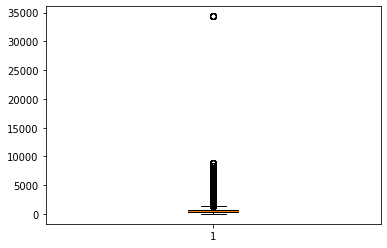

In [11]:
import matplotlib.pyplot as plt

plt.boxplot(copy_dataset_all['Comprimento_Target'])

In [12]:
indices_max_comprimento = copy_dataset_all[copy_dataset_all['Comprimento_Target'] == copy_dataset_all['Comprimento_Target'].max()].index

copy_dataset_all = copy_dataset_all.drop(indices_max_comprimento)

In [13]:
copy_dataset_all=copy_dataset_all.drop('Comprimento_Target', axis=1)

##### Apercebemo-nos de que o nosso dataset continha Targets que na sua sequência aminoacídica continham um suposto aa 'X'. Removemos todas as linhas do dataset que continham esse tipo de proteínas

In [14]:
sequences_with_X = copy_dataset_all[copy_dataset_all['Target'].str.contains('X')]

print(len(sequences_with_X['Target']))

45


In [15]:
indexes_with_X = copy_dataset_all[copy_dataset_all['Target'].str.contains('X')].index

copy_dataset_all = copy_dataset_all.drop(indexes_with_X)

copy_dataset_all = copy_dataset_all.reset_index(drop=True)

In [23]:
copy_dataset_all.shape

(800102, 5)

##### Sampling do nosso dataset para termos apenas 300 000 linhas, garantindo sempre que existe metade de 0 e metade de 1 na coluna 'Y'

In [24]:
import pandas as pd

num_samples = 300000

df_0 = copy_dataset_all[copy_dataset_all['Y'] == 0]
df_1 = copy_dataset_all[copy_dataset_all['Y'] == 1]

num_samples_0 = int(num_samples / 2)
num_samples_1 = num_samples - num_samples_0

samples_0 = df_0.sample(n=num_samples_0)
samples_1 = df_1.sample(n=num_samples_1)

final_df = pd.concat([samples_0, samples_1])

In [25]:
final_df = final_sample.sample(frac=1).reset_index(drop=True)

In [26]:
final_df

,miRNA_ID,miRNA,Target_ID,Target,Y
0,hsa-miR-513c-3p,UAAAUUUCACCUUUCUGAGAAGA,7027,MAKDAGLIEANGELKVFIDQNLSPGKGVVSLVAVHPSTVNPLGKQL...,1
1,mmu-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,81006,MVVSGVLTAPAVLTAPHSGTSNTTFVVFENSHVNITAPLPFQHPSA...,1
2,hsa-miR-766-3p,ACUCCAGCCCCACAGCCUCAGC,9911,MKRCRSDELQQQQGEEDGAGLEDAASHLPGADLRPGETTGANSAGG...,1
3,hsa-miR-561-3p,CAAAGUUUAAGAUCCUUGAAGU,91409,MSGAGVAAGTRPPSSPTPGSRRRRQRPSVGVQSLRPQSPQLRQSDP...,0
4,hsa-miR-6717-5p,AGGCGAUGUGGGGAUGUAGAGA,84941,MTEAGKLPLPLPPRLDWFVHTQMGQLAQDGVPEWFHGAISREDAEN...,0
...,...,...,...,...,...
299995,rno-miR-27a-5p,AGGGCUUAGCUGCUUGUGAGCA,240396,MPSGSSAALALALAAAPAPLPQPPPLPPPPPAGGPELEGDGLLLRE...,0
299996,hsa-miR-4256,AUCUGACCUGAUGAAGGU,153222,MPQPSVSGMDPPFGDAFRSHTFSEQTLMSTDLLANSSDPDFMYELD...,1
299997,hsa-miR-4728-5p,UGGGAGGGGAGAGGCAGCAAGCA,6506,MASTEGANNMPKQVEVRMHDSHLGSEEPKHRHLGLRLCDKLGKNLL...,1
299998,mmu-miR-363-3p,AAUUGCACGGUAUCCAUCUGUA,12877,MAFSLEEAAGRIKDCWDNQEVPALSTCSNANIFRRINAILDDSLDF...,1


##### Descritores para as protéinas do dataset filtrado

In [27]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from propy import PyPro

In [28]:
analysis = []

for i in range(0, 200001):
    protein = ProteinAnalysis(final_df['Target'][i])
    DesObject = PyPro.GetProDes(final_df['Target'][i])
    descriptors = [
        protein.length,
        protein.molecular_weight(),
        protein.isoelectric_point(),
        DesObject.GetCTD(),
    ]
    analysis.append(descriptors)

In [29]:
len(analysis)

200001

In [30]:
dict1 = {'Length': analysis[0][0],
        'Molecular Weight': analysis[0][1],
        'Isoelectric_Point': analysis[0][2]}

dict2 = analysis[0][3]

for key, value in dict1.items():
    final_df[key] = None
    
for key, value in dict2.items():
    final_df[key] = None
    
final_df

,miRNA_ID,miRNA,Target_ID,Target,Y,Length,Molecular Weight,Isoelectric_Point,_PolarizabilityC1,_PolarizabilityC2,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,hsa-miR-513c-3p,UAAAUUUCACCUUUCUGAGAAGA,7027,MAKDAGLIEANGELKVFIDQNLSPGKGVVSLVAVHPSTVNPLGKQL...,1,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,mmu-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,81006,MVVSGVLTAPAVLTAPHSGTSNTTFVVFENSHVNITAPLPFQHPSA...,1,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,hsa-miR-766-3p,ACUCCAGCCCCACAGCCUCAGC,9911,MKRCRSDELQQQQGEEDGAGLEDAASHLPGADLRPGETTGANSAGG...,1,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,hsa-miR-561-3p,CAAAGUUUAAGAUCCUUGAAGU,91409,MSGAGVAAGTRPPSSPTPGSRRRRQRPSVGVQSLRPQSPQLRQSDP...,0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,hsa-miR-6717-5p,AGGCGAUGUGGGGAUGUAGAGA,84941,MTEAGKLPLPLPPRLDWFVHTQMGQLAQDGVPEWFHGAISREDAEN...,0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,rno-miR-27a-5p,AGGGCUUAGCUGCUUGUGAGCA,240396,MPSGSSAALALALAAAPAPLPQPPPLPPPPPAGGPELEGDGLLLRE...,0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
299996,hsa-miR-4256,AUCUGACCUGAUGAAGGU,153222,MPQPSVSGMDPPFGDAFRSHTFSEQTLMSTDLLANSSDPDFMYELD...,1,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
299997,hsa-miR-4728-5p,UGGGAGGGGAGAGGCAGCAAGCA,6506,MASTEGANNMPKQVEVRMHDSHLGSEEPKHRHLGLRLCDKLGKNLL...,1,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
299998,mmu-miR-363-3p,AAUUGCACGGUAUCCAUCUGUA,12877,MAFSLEEAAGRIKDCWDNQEVPALSTCSNANIFRRINAILDDSLDF...,1,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [31]:
for i in range(0, len(analysis)):
    
    dict1 = {'Length': analysis[i][0],
        'Molecular Weight': analysis[i][1],
        'Isoelectric_Point': analysis[i][2]}
    
    dict2 = analysis[i][3]
    
    dict_combined = {**dict1, **dict2}
    
    for key, value in dict_combined.items():
        col_name = key
        final_df.at[i, col_name] = value

In [32]:
final_df.to_csv('dataset_all_sampled.csv')

In [33]:
final_df

,miRNA_ID,miRNA,Target_ID,Target,Y,Length,Molecular Weight,Isoelectric_Point,_PolarizabilityC1,_PolarizabilityC2,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,hsa-miR-513c-3p,UAAAUUUCACCUUUCUGAGAAGA,7027,MAKDAGLIEANGELKVFIDQNLSPGKGVVSLVAVHPSTVNPLGKQL...,1,410,45069.9516,5.73502,0.337,0.456,...,0.488,20.732,47.561,80.976,96.098,0.244,21.463,50.0,70.976,98.293
1,mmu-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,81006,MVVSGVLTAPAVLTAPHSGTSNTTFVVFENSHVNITAPLPFQHPSA...,1,425,47787.4065,9.808236,0.287,0.442,...,0.941,16.706,50.353,74.353,99.529,0.235,26.118,46.118,73.412,100.0
2,hsa-miR-766-3p,ACUCCAGCCCCACAGCCUCAGC,9911,MKRCRSDELQQQQGEEDGAGLEDAASHLPGADLRPGETTGANSAGG...,1,709,77447.6813,6.3374,0.368,0.425,...,0.846,22.144,41.326,68.547,100.0,0.141,35.261,60.367,88.575,99.718
3,hsa-miR-561-3p,CAAAGUUUAAGAUCCUUGAAGU,91409,MSGAGVAAGTRPPSSPTPGSRRRRQRPSVGVQSLRPQSPQLRQSDP...,0,380,41825.1093,10.457562,0.318,0.445,...,0.526,27.105,44.737,67.895,99.474,0.263,27.895,57.105,77.895,100.0
4,hsa-miR-6717-5p,AGGCGAUGUGGGGAUGUAGAGA,84941,MTEAGKLPLPLPPRLDWFVHTQMGQLAQDGVPEWFHGAISREDAEN...,0,352,39001.5968,6.642,0.324,0.452,...,0.568,25.284,52.841,75.568,99.716,0.284,18.466,39.205,65.341,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,rno-miR-27a-5p,AGGGCUUAGCUGCUUGUGAGCA,240396,MPSGSSAALALALAAAPAPLPQPPPLPPPPPAGGPELEGDGLLLRE...,0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
299996,hsa-miR-4256,AUCUGACCUGAUGAAGGU,153222,MPQPSVSGMDPPFGDAFRSHTFSEQTLMSTDLLANSSDPDFMYELD...,1,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
299997,hsa-miR-4728-5p,UGGGAGGGGAGAGGCAGCAAGCA,6506,MASTEGANNMPKQVEVRMHDSHLGSEEPKHRHLGLRLCDKLGKNLL...,1,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
299998,mmu-miR-363-3p,AAUUGCACGGUAUCCAUCUGUA,12877,MAFSLEEAAGRIKDCWDNQEVPALSTCSNANIFRRINAILDDSLDF...,1,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [34]:
analysis = []

for i in range(200001, 300000):
    protein = ProteinAnalysis(final_df['Target'][i])
    DesObject = PyPro.GetProDes(final_df['Target'][i])
    descriptors = [
        protein.length,
        protein.molecular_weight(),
        protein.isoelectric_point(),
        DesObject.GetCTD(),
    ]
    analysis.append(descriptors)

In [36]:
len(analysis)

99999

In [37]:
for i in range(0, len(analysis)):
    
    dict1 = {'Length': analysis[i][0],
        'Molecular Weight': analysis[i][1],
        'Isoelectric_Point': analysis[i][2]}
    
    dict2 = analysis[i][3]
    
    dict_combined = {**dict1, **dict2}
    
    for key, value in dict_combined.items():
        col_name = key
        final_df.at[i + 200001, col_name] = value

In [38]:
final_df.to_csv('dataset_all_sampled.csv')

In [39]:
final_df

,miRNA_ID,miRNA,Target_ID,Target,Y,Length,Molecular Weight,Isoelectric_Point,_PolarizabilityC1,_PolarizabilityC2,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,hsa-miR-513c-3p,UAAAUUUCACCUUUCUGAGAAGA,7027,MAKDAGLIEANGELKVFIDQNLSPGKGVVSLVAVHPSTVNPLGKQL...,1,410,45069.9516,5.73502,0.337,0.456,...,0.488,20.732,47.561,80.976,96.098,0.244,21.463,50.0,70.976,98.293
1,mmu-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,81006,MVVSGVLTAPAVLTAPHSGTSNTTFVVFENSHVNITAPLPFQHPSA...,1,425,47787.4065,9.808236,0.287,0.442,...,0.941,16.706,50.353,74.353,99.529,0.235,26.118,46.118,73.412,100.0
2,hsa-miR-766-3p,ACUCCAGCCCCACAGCCUCAGC,9911,MKRCRSDELQQQQGEEDGAGLEDAASHLPGADLRPGETTGANSAGG...,1,709,77447.6813,6.3374,0.368,0.425,...,0.846,22.144,41.326,68.547,100.0,0.141,35.261,60.367,88.575,99.718
3,hsa-miR-561-3p,CAAAGUUUAAGAUCCUUGAAGU,91409,MSGAGVAAGTRPPSSPTPGSRRRRQRPSVGVQSLRPQSPQLRQSDP...,0,380,41825.1093,10.457562,0.318,0.445,...,0.526,27.105,44.737,67.895,99.474,0.263,27.895,57.105,77.895,100.0
4,hsa-miR-6717-5p,AGGCGAUGUGGGGAUGUAGAGA,84941,MTEAGKLPLPLPPRLDWFVHTQMGQLAQDGVPEWFHGAISREDAEN...,0,352,39001.5968,6.642,0.324,0.452,...,0.568,25.284,52.841,75.568,99.716,0.284,18.466,39.205,65.341,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,rno-miR-27a-5p,AGGGCUUAGCUGCUUGUGAGCA,240396,MPSGSSAALALALAAAPAPLPQPPPLPPPPPAGGPELEGDGLLLRE...,0,652,68572.8992,4.917562,0.394,0.44,...,0.307,23.466,48.16,75.153,100.0,0.153,29.141,51.227,75.92,99.693
299996,hsa-miR-4256,AUCUGACCUGAUGAAGGU,153222,MPQPSVSGMDPPFGDAFRSHTFSEQTLMSTDLLANSSDPDFMYELD...,1,639,72147.992,4.763528,0.326,0.455,...,0.313,24.413,46.166,70.892,99.687,0.156,20.814,45.696,79.03,100.0
299997,hsa-miR-4728-5p,UGGGAGGGGAGAGGCAGCAAGCA,6506,MASTEGANNMPKQVEVRMHDSHLGSEEPKHRHLGLRLCDKLGKNLL...,1,574,62103.5598,6.089184,0.324,0.467,...,0.348,22.3,54.704,75.958,99.129,0.174,23.868,48.955,70.209,99.303
299998,mmu-miR-363-3p,AAUUGCACGGUAUCCAUCUGUA,12877,MAFSLEEAAGRIKDCWDNQEVPALSTCSNANIFRRINAILDDSLDF...,1,561,61916.543,7.860969,0.36,0.406,...,0.357,26.381,45.811,70.588,98.752,0.178,24.777,55.615,77.184,99.109


In [40]:
final_df.shape

(300000, 155)

##### One Hot Encoding para as sequência de miRNA
(mesmo com o dataset filtrado não nos foi possível proceder aos encodings de todos os targets)

In [2]:
#import pandas as pd
#final_df = pd.read_csv('dataset_all_sampled.csv', index_col=0)

In [3]:
import numpy as np

def rna_one_hot_encoder(sequence):
    
    elements = ['A', 'U', 'G', 'C']
    
    encoding = np.zeros((len(sequence), len(elements)))

    for i, char in enumerate(sequence):
        if char in elements:
            encoding[i, elements.index(char)] = 1

    return encoding

In [4]:
rna_encoders = []

for seq in final_df['miRNA']:
    rna_encoders.append(rna_one_hot_encoder(seq))

In [5]:
final_df.insert(2, 'miRNA_one_hot_encoding', None)

In [6]:
final_df

,miRNA_ID,miRNA,miRNA_one_hot_encoding,Target_ID,Target,Y,Length,Molecular Weight,Isoelectric_Point,_PolarizabilityC1,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,hsa-miR-513c-3p,UAAAUUUCACCUUUCUGAGAAGA,None,7027,MAKDAGLIEANGELKVFIDQNLSPGKGVVSLVAVHPSTVNPLGKQL...,1,410,45069.9516,5.735020,0.337,...,0.488,20.732,47.561,80.976,96.098,0.244,21.463,50.000,70.976,98.293
1,mmu-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,None,81006,MVVSGVLTAPAVLTAPHSGTSNTTFVVFENSHVNITAPLPFQHPSA...,1,425,47787.4065,9.808236,0.287,...,0.941,16.706,50.353,74.353,99.529,0.235,26.118,46.118,73.412,100.000
2,hsa-miR-766-3p,ACUCCAGCCCCACAGCCUCAGC,None,9911,MKRCRSDELQQQQGEEDGAGLEDAASHLPGADLRPGETTGANSAGG...,1,709,77447.6813,6.337400,0.368,...,0.846,22.144,41.326,68.547,100.000,0.141,35.261,60.367,88.575,99.718
3,hsa-miR-561-3p,CAAAGUUUAAGAUCCUUGAAGU,None,91409,MSGAGVAAGTRPPSSPTPGSRRRRQRPSVGVQSLRPQSPQLRQSDP...,0,380,41825.1093,10.457562,0.318,...,0.526,27.105,44.737,67.895,99.474,0.263,27.895,57.105,77.895,100.000
4,hsa-miR-6717-5p,AGGCGAUGUGGGGAUGUAGAGA,None,84941,MTEAGKLPLPLPPRLDWFVHTQMGQLAQDGVPEWFHGAISREDAEN...,0,352,39001.5968,6.642000,0.324,...,0.568,25.284,52.841,75.568,99.716,0.284,18.466,39.205,65.341,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,rno-miR-27a-5p,AGGGCUUAGCUGCUUGUGAGCA,None,240396,MPSGSSAALALALAAAPAPLPQPPPLPPPPPAGGPELEGDGLLLRE...,0,652,68572.8992,4.917562,0.394,...,0.307,23.466,48.160,75.153,100.000,0.153,29.141,51.227,75.920,99.693
299996,hsa-miR-4256,AUCUGACCUGAUGAAGGU,None,153222,MPQPSVSGMDPPFGDAFRSHTFSEQTLMSTDLLANSSDPDFMYELD...,1,639,72147.9920,4.763528,0.326,...,0.313,24.413,46.166,70.892,99.687,0.156,20.814,45.696,79.030,100.000
299997,hsa-miR-4728-5p,UGGGAGGGGAGAGGCAGCAAGCA,None,6506,MASTEGANNMPKQVEVRMHDSHLGSEEPKHRHLGLRLCDKLGKNLL...,1,574,62103.5598,6.089184,0.324,...,0.348,22.300,54.704,75.958,99.129,0.174,23.868,48.955,70.209,99.303
299998,mmu-miR-363-3p,AAUUGCACGGUAUCCAUCUGUA,None,12877,MAFSLEEAAGRIKDCWDNQEVPALSTCSNANIFRRINAILDDSLDF...,1,561,61916.5430,7.860969,0.360,...,0.357,26.381,45.811,70.588,98.752,0.178,24.777,55.615,77.184,99.109


In [7]:
for i, encoder in enumerate(rna_encoders):
    final_df.at[i, 'miRNA_one_hot_encoding'] = encoder

In [8]:
final_df

,miRNA_ID,miRNA,miRNA_one_hot_encoding,Target_ID,Target,Y,Length,Molecular Weight,Isoelectric_Point,_PolarizabilityC1,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,hsa-miR-513c-3p,UAAAUUUCACCUUUCUGAGAAGA,"[[0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [...",7027,MAKDAGLIEANGELKVFIDQNLSPGKGVVSLVAVHPSTVNPLGKQL...,1,410,45069.9516,5.735020,0.337,...,0.488,20.732,47.561,80.976,96.098,0.244,21.463,50.000,70.976,98.293
1,mmu-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,"[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...",81006,MVVSGVLTAPAVLTAPHSGTSNTTFVVFENSHVNITAPLPFQHPSA...,1,425,47787.4065,9.808236,0.287,...,0.941,16.706,50.353,74.353,99.529,0.235,26.118,46.118,73.412,100.000
2,hsa-miR-766-3p,ACUCCAGCCCCACAGCCUCAGC,"[[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [...",9911,MKRCRSDELQQQQGEEDGAGLEDAASHLPGADLRPGETTGANSAGG...,1,709,77447.6813,6.337400,0.368,...,0.846,22.144,41.326,68.547,100.000,0.141,35.261,60.367,88.575,99.718
3,hsa-miR-561-3p,CAAAGUUUAAGAUCCUUGAAGU,"[[0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0], [...",91409,MSGAGVAAGTRPPSSPTPGSRRRRQRPSVGVQSLRPQSPQLRQSDP...,0,380,41825.1093,10.457562,0.318,...,0.526,27.105,44.737,67.895,99.474,0.263,27.895,57.105,77.895,100.000
4,hsa-miR-6717-5p,AGGCGAUGUGGGGAUGUAGAGA,"[[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...",84941,MTEAGKLPLPLPPRLDWFVHTQMGQLAQDGVPEWFHGAISREDAEN...,0,352,39001.5968,6.642000,0.324,...,0.568,25.284,52.841,75.568,99.716,0.284,18.466,39.205,65.341,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,rno-miR-27a-5p,AGGGCUUAGCUGCUUGUGAGCA,"[[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...",240396,MPSGSSAALALALAAAPAPLPQPPPLPPPPPAGGPELEGDGLLLRE...,0,652,68572.8992,4.917562,0.394,...,0.307,23.466,48.160,75.153,100.000,0.153,29.141,51.227,75.920,99.693
299996,hsa-miR-4256,AUCUGACCUGAUGAAGGU,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",153222,MPQPSVSGMDPPFGDAFRSHTFSEQTLMSTDLLANSSDPDFMYELD...,1,639,72147.9920,4.763528,0.326,...,0.313,24.413,46.166,70.892,99.687,0.156,20.814,45.696,79.030,100.000
299997,hsa-miR-4728-5p,UGGGAGGGGAGAGGCAGCAAGCA,"[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...",6506,MASTEGANNMPKQVEVRMHDSHLGSEEPKHRHLGLRLCDKLGKNLL...,1,574,62103.5598,6.089184,0.324,...,0.348,22.300,54.704,75.958,99.129,0.174,23.868,48.955,70.209,99.303
299998,mmu-miR-363-3p,AAUUGCACGGUAUCCAUCUGUA,"[[1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [...",12877,MAFSLEEAAGRIKDCWDNQEVPALSTCSNANIFRRINAILDDSLDF...,1,561,61916.5430,7.860969,0.360,...,0.357,26.381,45.811,70.588,98.752,0.178,24.777,55.615,77.184,99.109


In [9]:
final_df.to_csv('dataset_sampled_after_one_hot_encoder.csv')

##### Como não encontramos um package que devolvesse automaticamente vários descritores de RNA, fizemos funções que retiravam o tamanho da seq, o ponto isoelétrico, peso molecular e melting point. Não achavamos coerente transformar as sequência de RNA em DNA, por motivos de sentido biológico para o problema

In [37]:
from Bio.Seq import Seq
from Bio.SeqUtils import molecular_weight, gc_fraction, MeltingTemp
from Bio.SeqUtils.IsoelectricPoint import IsoelectricPoint

sequence_length = []
weight = []
mt = []
ip = []

for seq in final_df['miRNA']:
    rna_sequence = Seq(seq)
    sequence_length.append(len(rna_sequence))
    weight.append(molecular_weight(rna_sequence, seq_type='RNA'))
    mt.append(MeltingTemp.Tm_NN(rna_sequence, nn_table = MeltingTemp.RNA_NN1))
    ip.append(IsoelectricPoint(rna_sequence).pi())

In [29]:
final_df.insert(3, 'Length_miRNA', None)
final_df.insert(4, 'Molecular_Weight_miRNA', None)
final_df.insert(5, 'MeltingTemp_miRNA', None)
final_df.insert(6, 'IsoelectricPoint_miRNA', None)

In [38]:
for i, length in enumerate(sequence_length):
    final_df.at[i, 'Length_miRNA'] = length

In [39]:
for i, mw in enumerate(weight):
    final_df.at[i, 'Molecular_Weight_miRNA'] = mw

In [40]:
for i, melt in enumerate(mt):
    final_df.at[i, 'MeltingTemp_miRNA'] = melt

In [41]:
for i, iso in enumerate(ip):
    final_df.at[i, 'IsoelectricPoint_miRNA'] = iso

In [42]:
final_df

,miRNA_ID,miRNA,miRNA_one_hot_encoding,Length_miRNA,Molecular_Weight_miRNA,MeltingTemp_miRNA,IsoelectricPoint_miRNA,Target_ID,Target,Y,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,hsa-miR-513c-3p,UAAAUUUCACCUUUCUGAGAAGA,"[[0. 1. 0. 0.], [1. 0. 0. 0.], [1. 0. 0. 0.], ...",23,7357.3312,58.520864,5.498627,7027,MAKDAGLIEANGELKVFIDQNLSPGKGVVSLVAVHPSTVNPLGKQL...,1,...,0.488,20.732,47.561,80.976,96.098,0.244,21.463,50.000,70.976,98.293
1,mmu-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [1. 0. 0. 0.], ...",22,7213.18,67.478431,5.525,81006,MVVSGVLTAPAVLTAPHSGTSNTTFVVFENSHVNITAPLPFQHPSA...,1,...,0.941,16.706,50.353,74.353,99.529,0.235,26.118,46.118,73.412,100.000
2,hsa-miR-766-3p,ACUCCAGCCCCACAGCCUCAGC,"[[1. 0. 0. 0.], [0. 0. 0. 1.], [0. 1. 0. 0.], ...",22,6974.1671,79.498174,5.485497,9911,MKRCRSDELQQQQGEEDGAGLEDAASHLPGADLRPGETTGANSAGG...,1,...,0.846,22.144,41.326,68.547,100.000,0.141,35.261,60.367,88.575,99.718
3,hsa-miR-561-3p,CAAAGUUUAAGAUCCUUGAAGU,"[[0. 0. 0. 1.], [1. 0. 0. 0.], [1. 0. 0. 0.], ...",22,7091.1893,56.414267,5.504936,91409,MSGAGVAAGTRPPSSPTPGSRRRRQRPSVGVQSLRPQSPQLRQSDP...,0,...,0.526,27.105,44.737,67.895,99.474,0.263,27.895,57.105,77.895,100.000
4,hsa-miR-6717-5p,AGGCGAUGUGGGGAUGUAGAGA,"[[1. 0. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",22,7320.3542,72.305092,5.561548,84941,MTEAGKLPLPLPPRLDWFVHTQMGQLAQDGVPEWFHGAISREDAEN...,0,...,0.568,25.284,52.841,75.568,99.716,0.284,18.466,39.205,65.341,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,rno-miR-27a-5p,AGGGCUUAGCUGCUUGUGAGCA,"[[1. 0. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",22,7154.2021,73.260477,5.538016,240396,MPSGSSAALALALAAAPAPLPQPPPLPPPPPAGGPELEGDGLLLRE...,0,...,0.307,23.466,48.160,75.153,100.000,0.153,29.141,51.227,75.920,99.693
299996,hsa-miR-4256,AUCUGACCUGAUGAAGGU,"[[1. 0. 0. 0.], [0. 1. 0. 0.], [0. 0. 0. 1.], ...",18,5836.4449,60.837182,5.545576,153222,MPQPSVSGMDPPFGDAFRSHTFSEQTLMSTDLLANSSDPDFMYELD...,1,...,0.313,24.413,46.166,70.892,99.687,0.156,20.814,45.696,79.030,100.000
299997,hsa-miR-4728-5p,UGGGAGGGGAGAGGCAGCAAGCA,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",23,7686.6298,79.9479,5.504936,6506,MASTEGANNMPKQVEVRMHDSHLGSEEPKHRHLGLRLCDKLGKNLL...,1,...,0.348,22.300,54.704,75.958,99.129,0.174,23.868,48.955,70.209,99.303
299998,mmu-miR-363-3p,AAUUGCACGGUAUCCAUCUGUA,"[[1. 0. 0. 0.], [1. 0. 0. 0.], [0. 1. 0. 0.], ...",22,7043.1399,64.342462,5.530741,12877,MAFSLEEAAGRIKDCWDNQEVPALSTCSNANIFRRINAILDDSLDF...,1,...,0.357,26.381,45.811,70.588,98.752,0.178,24.777,55.615,77.184,99.109


##### Seleção das colunas de interesse (descritores de miRNA + descritores Targets) para Variance Threshold

In [46]:
columns_of_interest = list(range(3, 7)) + list(range(10, len(final_df.columns)))

df = final_df.iloc[:, columns_of_interest]
df

,Length_miRNA,Molecular_Weight_miRNA,MeltingTemp_miRNA,IsoelectricPoint_miRNA,Length,Molecular Weight,Isoelectric_Point,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,23,7357.3312,58.520864,5.498627,410,45069.9516,5.735020,0.337,0.456,0.207,...,0.488,20.732,47.561,80.976,96.098,0.244,21.463,50.000,70.976,98.293
1,22,7213.18,67.478431,5.525,425,47787.4065,9.808236,0.287,0.442,0.271,...,0.941,16.706,50.353,74.353,99.529,0.235,26.118,46.118,73.412,100.000
2,22,6974.1671,79.498174,5.485497,709,77447.6813,6.337400,0.368,0.425,0.207,...,0.846,22.144,41.326,68.547,100.000,0.141,35.261,60.367,88.575,99.718
3,22,7091.1893,56.414267,5.504936,380,41825.1093,10.457562,0.318,0.445,0.237,...,0.526,27.105,44.737,67.895,99.474,0.263,27.895,57.105,77.895,100.000
4,22,7320.3542,72.305092,5.561548,352,39001.5968,6.642000,0.324,0.452,0.224,...,0.568,25.284,52.841,75.568,99.716,0.284,18.466,39.205,65.341,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,22,7154.2021,73.260477,5.538016,652,68572.8992,4.917562,0.394,0.440,0.166,...,0.307,23.466,48.160,75.153,100.000,0.153,29.141,51.227,75.920,99.693
299996,18,5836.4449,60.837182,5.545576,639,72147.9920,4.763528,0.326,0.455,0.219,...,0.313,24.413,46.166,70.892,99.687,0.156,20.814,45.696,79.030,100.000
299997,23,7686.6298,79.9479,5.504936,574,62103.5598,6.089184,0.324,0.467,0.209,...,0.348,22.300,54.704,75.958,99.129,0.174,23.868,48.955,70.209,99.303
299998,22,7043.1399,64.342462,5.530741,561,61916.5430,7.860969,0.360,0.406,0.234,...,0.357,26.381,45.811,70.588,98.752,0.178,24.777,55.615,77.184,99.109


In [47]:
from sklearn.feature_selection import VarianceThreshold

filter_vt = VarianceThreshold(threshold=1.5)
data_filtered_vt = filter_vt.fit_transform(df)

print(df.shape)
print(data_filtered_vt.shape)

(300000, 154)
(300000, 95)


In [53]:
data_filtered_df = pd.DataFrame(data_filtered_vt, columns=df.columns[filter_vt.get_support()])

In [52]:
remaining_columns = list(range(3)) + list(range(7, 10))

remaining_df = final_df.iloc[:, remaining_columns]

remaining_df

,miRNA_ID,miRNA,miRNA_one_hot_encoding,Target_ID,Target,Y
0,hsa-miR-513c-3p,UAAAUUUCACCUUUCUGAGAAGA,"[[0. 1. 0. 0.], [1. 0. 0. 0.], [1. 0. 0. 0.], ...",7027,MAKDAGLIEANGELKVFIDQNLSPGKGVVSLVAVHPSTVNPLGKQL...,1
1,mmu-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [1. 0. 0. 0.], ...",81006,MVVSGVLTAPAVLTAPHSGTSNTTFVVFENSHVNITAPLPFQHPSA...,1
2,hsa-miR-766-3p,ACUCCAGCCCCACAGCCUCAGC,"[[1. 0. 0. 0.], [0. 0. 0. 1.], [0. 1. 0. 0.], ...",9911,MKRCRSDELQQQQGEEDGAGLEDAASHLPGADLRPGETTGANSAGG...,1
3,hsa-miR-561-3p,CAAAGUUUAAGAUCCUUGAAGU,"[[0. 0. 0. 1.], [1. 0. 0. 0.], [1. 0. 0. 0.], ...",91409,MSGAGVAAGTRPPSSPTPGSRRRRQRPSVGVQSLRPQSPQLRQSDP...,0
4,hsa-miR-6717-5p,AGGCGAUGUGGGGAUGUAGAGA,"[[1. 0. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",84941,MTEAGKLPLPLPPRLDWFVHTQMGQLAQDGVPEWFHGAISREDAEN...,0
...,...,...,...,...,...,...
299995,rno-miR-27a-5p,AGGGCUUAGCUGCUUGUGAGCA,"[[1. 0. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",240396,MPSGSSAALALALAAAPAPLPQPPPLPPPPPAGGPELEGDGLLLRE...,0
299996,hsa-miR-4256,AUCUGACCUGAUGAAGGU,"[[1. 0. 0. 0.], [0. 1. 0. 0.], [0. 0. 0. 1.], ...",153222,MPQPSVSGMDPPFGDAFRSHTFSEQTLMSTDLLANSSDPDFMYELD...,1
299997,hsa-miR-4728-5p,UGGGAGGGGAGAGGCAGCAAGCA,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",6506,MASTEGANNMPKQVEVRMHDSHLGSEEPKHRHLGLRLCDKLGKNLL...,1
299998,mmu-miR-363-3p,AAUUGCACGGUAUCCAUCUGUA,"[[1. 0. 0. 0.], [1. 0. 0. 0.], [0. 1. 0. 0.], ...",12877,MAFSLEEAAGRIKDCWDNQEVPALSTCSNANIFRRINAILDDSLDF...,1


In [54]:
import pandas as pd

filtered_dataset = pd.concat([remaining_df, data_filtered_df], axis=1)

filtered_dataset

,miRNA_ID,miRNA,miRNA_one_hot_encoding,Target_ID,Target,Y,Length_miRNA,Molecular_Weight_miRNA,MeltingTemp_miRNA,Length,...,_HydrophobicityD1050,_HydrophobicityD1075,_HydrophobicityD1100,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,hsa-miR-513c-3p,UAAAUUUCACCUUUCUGAGAAGA,"[[0. 1. 0. 0.], [1. 0. 0. 0.], [1. 0. 0. 0.], ...",7027,MAKDAGLIEANGELKVFIDQNLSPGKGVVSLVAVHPSTVNPLGKQL...,1,23,7357.3312,58.520864,410,...,50.976,71.22,100.0,20.732,47.561,80.976,21.463,50.0,70.976,98.293
1,mmu-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [1. 0. 0. 0.], ...",81006,MVVSGVLTAPAVLTAPHSGTSNTTFVVFENSHVNITAPLPFQHPSA...,1,22,7213.18,67.478431,425,...,54.353,82.824,99.294,16.706,50.353,74.353,26.118,46.118,73.412,100.0
2,hsa-miR-766-3p,ACUCCAGCCCCACAGCCUCAGC,"[[1. 0. 0. 0.], [0. 0. 0. 1.], [0. 1. 0. 0.], ...",9911,MKRCRSDELQQQQGEEDGAGLEDAASHLPGADLRPGETTGANSAGG...,1,22,6974.1671,79.498174,709,...,47.955,75.458,99.154,22.144,41.326,68.547,35.261,60.367,88.575,99.718
3,hsa-miR-561-3p,CAAAGUUUAAGAUCCUUGAAGU,"[[0. 0. 0. 1.], [1. 0. 0. 0.], [1. 0. 0. 0.], ...",91409,MSGAGVAAGTRPPSSPTPGSRRRRQRPSVGVQSLRPQSPQLRQSDP...,0,22,7091.1893,56.414267,380,...,51.842,76.579,99.211,27.105,44.737,67.895,27.895,57.105,77.895,100.0
4,hsa-miR-6717-5p,AGGCGAUGUGGGGAUGUAGAGA,"[[1. 0. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",84941,MTEAGKLPLPLPPRLDWFVHTQMGQLAQDGVPEWFHGAISREDAEN...,0,22,7320.3542,72.305092,352,...,52.273,78.125,97.443,25.284,52.841,75.568,18.466,39.205,65.341,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,rno-miR-27a-5p,AGGGCUUAGCUGCUUGUGAGCA,"[[1. 0. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",240396,MPSGSSAALALALAAAPAPLPQPPPLPPPPPAGGPELEGDGLLLRE...,0,22,7154.2021,73.260477,652,...,49.54,72.086,99.54,23.466,48.16,75.153,29.141,51.227,75.92,99.693
299996,hsa-miR-4256,AUCUGACCUGAUGAAGGU,"[[1. 0. 0. 0.], [0. 1. 0. 0.], [0. 0. 0. 1.], ...",153222,MPQPSVSGMDPPFGDAFRSHTFSEQTLMSTDLLANSSDPDFMYELD...,1,18,5836.4449,60.837182,639,...,56.495,75.43,99.844,24.413,46.166,70.892,20.814,45.696,79.03,100.0
299997,hsa-miR-4728-5p,UGGGAGGGGAGAGGCAGCAAGCA,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",6506,MASTEGANNMPKQVEVRMHDSHLGSEEPKHRHLGLRLCDKLGKNLL...,1,23,7686.6298,79.9479,574,...,47.213,83.972,100.0,22.3,54.704,75.958,23.868,48.955,70.209,99.303
299998,mmu-miR-363-3p,AAUUGCACGGUAUCCAUCUGUA,"[[1. 0. 0. 0.], [1. 0. 0. 0.], [0. 1. 0. 0.], ...",12877,MAFSLEEAAGRIKDCWDNQEVPALSTCSNANIFRRINAILDDSLDF...,1,22,7043.1399,64.342462,561,...,50.267,75.401,100.0,26.381,45.811,70.588,24.777,55.615,77.184,99.109


In [55]:
filtered_dataset.to_csv('dataset_sample_encoded_after_VarianceThreshold.csv')

##### Removemos linhas duplicadas do dataset (para o mesmo miRNA havia duas linhas, ou mais, para o mesmo Target)

In [56]:
duplicated_rows = filtered_dataset.duplicated(subset=['miRNA', 'Target'], keep='first')

In [57]:
filtered_dataset[duplicated_rows]

,miRNA_ID,miRNA,miRNA_one_hot_encoding,Target_ID,Target,Y,Length_miRNA,Molecular_Weight_miRNA,MeltingTemp_miRNA,Length,...,_HydrophobicityD1050,_HydrophobicityD1075,_HydrophobicityD1100,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
11404,rno-miR-122-5p,UGGAGUGUGACAAUGGUGUUUG,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",56209,MWLWEDQGGLLGPFSFVLVLLLVVTRSPFNACVLTGSLYILLRFFS...,0,22,7196.1958,65.481127,331,...,46.224,71.299,98.489,24.471,50.453,72.81,16.918,51.662,76.435,100.0
12514,hsa-miR-9-5p,UCUUUGGUUAUCUAGCUGUAUGA,"[[0. 1. 0. 0.], [0. 0. 0. 1.], [0. 1. 0. 0.], ...",4821,MSLTNTKTGFSVKDILDLPDTNDEEGSVAEGPEEENEGPEPAKRAG...,1,23,7344.235,62.038032,273,...,47.619,67.399,98.901,26.374,45.055,79.487,22.344,60.073,75.824,100.0
16460,cfa-miR-539,GGAGAAAUUAUCCUUGGUGUGU,"[[0. 0. 1. 0.], [0. 0. 1. 0.], [1. 0. 0. 0.], ...",57282,MEIKDQGAQMEPLLPTRNDEEAVVDRGGTRSILKTHFEKEDLEGHR...,0,22,7140.1723,63.436539,1118,...,37.835,71.288,99.642,26.476,49.016,71.914,32.558,56.887,78.175,99.374
20042,hsa-miR-548x-5p,UGCAAAAGUAAUUGCAGUUUUUG,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [0. 0. 0. 1.], ...",440093,MARTKQTARKSTGGKAPRKQLATKAARKSTPSTCGVKPHRYRPGTV...,1,23,7414.3395,57.043303,135,...,50.37,71.852,99.259,18.519,33.333,70.37,44.444,57.778,77.037,96.296
22432,hsa-miR-3689b-3p,CUGGGAGGUGUGAUAUUGUGGU,"[[0. 0. 0. 1.], [0. 1. 0. 0.], [0. 0. 1. 0.], ...",9716,MAAPAQPKKIVAPTVSQINAEFVTQLACKYWAPHIKKKSPFDIKVI...,1,22,7212.1952,68.808545,1485,...,48.148,72.727,100.0,28.822,54.68,80.067,20.673,45.926,72.458,98.653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299167,hsa-miR-548ae-5p,AAAAGUAAUUGUGGUUUUUG,"[[1. 0. 0. 0.], [1. 0. 0. 0.], [1. 0. 0. 0.], ...",139411,MLRQVLHRGLRTCFSRLGHFIASHPVFFASAPVLISILLGASFSRY...,1,20,6474.7712,48.297668,888,...,50.788,72.185,99.55,23.423,46.059,69.369,28.041,54.505,80.18,100.0
299217,hsa-miR-523-5p,CUCUAGAGGGAAGCGCUUUCUG,"[[0. 0. 0. 1.], [0. 1. 0. 0.], [0. 0. 0. 1.], ...",7128,MAEQVLPQALYLSNMRKAVKIRERTPEDIFKPTNGIIHHFKTMHRY...,1,22,7114.178,69.111927,790,...,46.329,76.709,99.62,31.139,58.101,75.823,20.0,39.494,67.848,99.747
299572,mmu-miR-466p-3p,AUACAUACACGCACACAUAAGA,"[[1. 0. 0. 0.], [0. 1. 0. 0.], [1. 0. 0. 0.], ...",70484,MEEPNAAPLPSRLARLLSALFYGTCSFLIVLVNKALLTTYGFPSPI...,1,22,7079.276,61.323726,326,...,54.908,70.859,99.693,24.233,46.626,76.687,25.153,48.466,72.699,99.387
299904,hsa-miR-3689b-3p,CUGGGAGGUGUGAUAUUGUGGU,"[[0. 0. 0. 1.], [0. 1. 0. 0.], [0. 0. 1. 0.], ...",129642,MATTSTTGSTLLQPLSNAVQLPIDQVNFVVCQLFALLAAIWFRTYL...,1,22,7212.1952,68.808545,520,...,56.923,79.038,100.0,24.231,48.654,72.692,19.808,47.308,73.846,99.615


In [58]:
filtered_dataset_no_duplicate_rows = filtered_dataset.drop_duplicates(subset=['miRNA', 'Target'], keep='first')

In [59]:
filtered_dataset_no_duplicate_rows

,miRNA_ID,miRNA,miRNA_one_hot_encoding,Target_ID,Target,Y,Length_miRNA,Molecular_Weight_miRNA,MeltingTemp_miRNA,Length,...,_HydrophobicityD1050,_HydrophobicityD1075,_HydrophobicityD1100,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,hsa-miR-513c-3p,UAAAUUUCACCUUUCUGAGAAGA,"[[0. 1. 0. 0.], [1. 0. 0. 0.], [1. 0. 0. 0.], ...",7027,MAKDAGLIEANGELKVFIDQNLSPGKGVVSLVAVHPSTVNPLGKQL...,1,23,7357.3312,58.520864,410,...,50.976,71.22,100.0,20.732,47.561,80.976,21.463,50.0,70.976,98.293
1,mmu-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [1. 0. 0. 0.], ...",81006,MVVSGVLTAPAVLTAPHSGTSNTTFVVFENSHVNITAPLPFQHPSA...,1,22,7213.18,67.478431,425,...,54.353,82.824,99.294,16.706,50.353,74.353,26.118,46.118,73.412,100.0
2,hsa-miR-766-3p,ACUCCAGCCCCACAGCCUCAGC,"[[1. 0. 0. 0.], [0. 0. 0. 1.], [0. 1. 0. 0.], ...",9911,MKRCRSDELQQQQGEEDGAGLEDAASHLPGADLRPGETTGANSAGG...,1,22,6974.1671,79.498174,709,...,47.955,75.458,99.154,22.144,41.326,68.547,35.261,60.367,88.575,99.718
3,hsa-miR-561-3p,CAAAGUUUAAGAUCCUUGAAGU,"[[0. 0. 0. 1.], [1. 0. 0. 0.], [1. 0. 0. 0.], ...",91409,MSGAGVAAGTRPPSSPTPGSRRRRQRPSVGVQSLRPQSPQLRQSDP...,0,22,7091.1893,56.414267,380,...,51.842,76.579,99.211,27.105,44.737,67.895,27.895,57.105,77.895,100.0
4,hsa-miR-6717-5p,AGGCGAUGUGGGGAUGUAGAGA,"[[1. 0. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",84941,MTEAGKLPLPLPPRLDWFVHTQMGQLAQDGVPEWFHGAISREDAEN...,0,22,7320.3542,72.305092,352,...,52.273,78.125,97.443,25.284,52.841,75.568,18.466,39.205,65.341,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,rno-miR-27a-5p,AGGGCUUAGCUGCUUGUGAGCA,"[[1. 0. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",240396,MPSGSSAALALALAAAPAPLPQPPPLPPPPPAGGPELEGDGLLLRE...,0,22,7154.2021,73.260477,652,...,49.54,72.086,99.54,23.466,48.16,75.153,29.141,51.227,75.92,99.693
299996,hsa-miR-4256,AUCUGACCUGAUGAAGGU,"[[1. 0. 0. 0.], [0. 1. 0. 0.], [0. 0. 0. 1.], ...",153222,MPQPSVSGMDPPFGDAFRSHTFSEQTLMSTDLLANSSDPDFMYELD...,1,18,5836.4449,60.837182,639,...,56.495,75.43,99.844,24.413,46.166,70.892,20.814,45.696,79.03,100.0
299997,hsa-miR-4728-5p,UGGGAGGGGAGAGGCAGCAAGCA,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",6506,MASTEGANNMPKQVEVRMHDSHLGSEEPKHRHLGLRLCDKLGKNLL...,1,23,7686.6298,79.9479,574,...,47.213,83.972,100.0,22.3,54.704,75.958,23.868,48.955,70.209,99.303
299998,mmu-miR-363-3p,AAUUGCACGGUAUCCAUCUGUA,"[[1. 0. 0. 0.], [1. 0. 0. 0.], [0. 1. 0. 0.], ...",12877,MAFSLEEAAGRIKDCWDNQEVPALSTCSNANIFRRINAILDDSLDF...,1,22,7043.1399,64.342462,561,...,50.267,75.401,100.0,26.381,45.811,70.588,24.777,55.615,77.184,99.109


In [60]:
filtered_dataset_no_duplicate_rows = filtered_dataset_no_duplicate_rows.reset_index(drop=True)
filtered_dataset_no_duplicate_rows

,miRNA_ID,miRNA,miRNA_one_hot_encoding,Target_ID,Target,Y,Length_miRNA,Molecular_Weight_miRNA,MeltingTemp_miRNA,Length,...,_HydrophobicityD1050,_HydrophobicityD1075,_HydrophobicityD1100,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,hsa-miR-513c-3p,UAAAUUUCACCUUUCUGAGAAGA,"[[0. 1. 0. 0.], [1. 0. 0. 0.], [1. 0. 0. 0.], ...",7027,MAKDAGLIEANGELKVFIDQNLSPGKGVVSLVAVHPSTVNPLGKQL...,1,23,7357.3312,58.520864,410,...,50.976,71.22,100.0,20.732,47.561,80.976,21.463,50.0,70.976,98.293
1,mmu-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [1. 0. 0. 0.], ...",81006,MVVSGVLTAPAVLTAPHSGTSNTTFVVFENSHVNITAPLPFQHPSA...,1,22,7213.18,67.478431,425,...,54.353,82.824,99.294,16.706,50.353,74.353,26.118,46.118,73.412,100.0
2,hsa-miR-766-3p,ACUCCAGCCCCACAGCCUCAGC,"[[1. 0. 0. 0.], [0. 0. 0. 1.], [0. 1. 0. 0.], ...",9911,MKRCRSDELQQQQGEEDGAGLEDAASHLPGADLRPGETTGANSAGG...,1,22,6974.1671,79.498174,709,...,47.955,75.458,99.154,22.144,41.326,68.547,35.261,60.367,88.575,99.718
3,hsa-miR-561-3p,CAAAGUUUAAGAUCCUUGAAGU,"[[0. 0. 0. 1.], [1. 0. 0. 0.], [1. 0. 0. 0.], ...",91409,MSGAGVAAGTRPPSSPTPGSRRRRQRPSVGVQSLRPQSPQLRQSDP...,0,22,7091.1893,56.414267,380,...,51.842,76.579,99.211,27.105,44.737,67.895,27.895,57.105,77.895,100.0
4,hsa-miR-6717-5p,AGGCGAUGUGGGGAUGUAGAGA,"[[1. 0. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",84941,MTEAGKLPLPLPPRLDWFVHTQMGQLAQDGVPEWFHGAISREDAEN...,0,22,7320.3542,72.305092,352,...,52.273,78.125,97.443,25.284,52.841,75.568,18.466,39.205,65.341,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299254,rno-miR-27a-5p,AGGGCUUAGCUGCUUGUGAGCA,"[[1. 0. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",240396,MPSGSSAALALALAAAPAPLPQPPPLPPPPPAGGPELEGDGLLLRE...,0,22,7154.2021,73.260477,652,...,49.54,72.086,99.54,23.466,48.16,75.153,29.141,51.227,75.92,99.693
299255,hsa-miR-4256,AUCUGACCUGAUGAAGGU,"[[1. 0. 0. 0.], [0. 1. 0. 0.], [0. 0. 0. 1.], ...",153222,MPQPSVSGMDPPFGDAFRSHTFSEQTLMSTDLLANSSDPDFMYELD...,1,18,5836.4449,60.837182,639,...,56.495,75.43,99.844,24.413,46.166,70.892,20.814,45.696,79.03,100.0
299256,hsa-miR-4728-5p,UGGGAGGGGAGAGGCAGCAAGCA,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",6506,MASTEGANNMPKQVEVRMHDSHLGSEEPKHRHLGLRLCDKLGKNLL...,1,23,7686.6298,79.9479,574,...,47.213,83.972,100.0,22.3,54.704,75.958,23.868,48.955,70.209,99.303
299257,mmu-miR-363-3p,AAUUGCACGGUAUCCAUCUGUA,"[[1. 0. 0. 0.], [1. 0. 0. 0.], [0. 1. 0. 0.], ...",12877,MAFSLEEAAGRIKDCWDNQEVPALSTCSNANIFRRINAILDDSLDF...,1,22,7043.1399,64.342462,561,...,50.267,75.401,100.0,26.381,45.811,70.588,24.777,55.615,77.184,99.109


In [61]:
print(final_df.shape)
print(filtered_dataset_no_duplicate_rows.shape)

(300000, 160)
(299259, 101)


In [62]:
filtered_dataset_no_duplicate_rows.to_csv('filtered_dataset_no_duplicate_rows.csv')

##### Normalização MinMaxScaler para converter os dados de descritores para valores entre 0 e 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

descritores = filtered_dataset_no_duplicate_rows.iloc[:, 6:]

scaler = MinMaxScaler()

descritores_norm = scaler.fit_transform(descritores)

filtered_dataset_no_duplicate_rows.iloc[:, 6:] = descritores_norm

In [64]:
filtered_dataset_no_duplicate_rows

,miRNA_ID,miRNA,miRNA_one_hot_encoding,Target_ID,Target,Y,Length_miRNA,Molecular_Weight_miRNA,MeltingTemp_miRNA,Length,...,_HydrophobicityD1050,_HydrophobicityD1075,_HydrophobicityD1100,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,hsa-miR-513c-3p,UAAAUUUCACCUUUCUGAGAAGA,"[[0. 1. 0. 0.], [1. 0. 0. 0.], [1. 0. 0. 0.], ...",7027,MAKDAGLIEANGELKVFIDQNLSPGKGVVSLVAVHPSTVNPLGKQL...,1,0.583333,0.594890,0.342354,0.043989,...,0.557516,0.587284,1.000000,0.146205,0.575775,0.884308,0.324815,0.574430,0.702390,0.975360
1,mmu-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [1. 0. 0. 0.], ...",81006,MVVSGVLTAPAVLTAPHSGTSNTTFVVFENSHVNITAPLPFQHPSA...,1,0.500000,0.558729,0.507304,0.045698,...,0.603062,0.794705,0.979604,0.100537,0.620981,0.799397,0.396740,0.523556,0.734732,1.000000
2,hsa-miR-766-3p,ACUCCAGCCCCACAGCCUCAGC,"[[1. 0. 0. 0.], [0. 0. 0. 1.], [0. 1. 0. 0.], ...",9911,MKRCRSDELQQQQGEEDGAGLEDAASHLPGADLRPGETTGANSAGG...,1,0.500000,0.498771,0.728643,0.078063,...,0.516771,0.663038,0.975560,0.162222,0.474823,0.724962,0.538010,0.710289,0.936046,0.995929
3,hsa-miR-561-3p,CAAAGUUUAAGAUCCUUGAAGU,"[[0. 0. 0. 1.], [1. 0. 0. 0.], [1. 0. 0. 0.], ...",91409,MSGAGVAAGTRPPSSPTPGSRRRRQRPSVGVQSLRPQSPQLRQSDP...,0,0.500000,0.528127,0.303562,0.040570,...,0.569195,0.683076,0.977206,0.218497,0.530051,0.716603,0.424197,0.667540,0.794251,1.000000
4,hsa-miR-6717-5p,AGGCGAUGUGGGGAUGUAGAGA,"[[1. 0. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",84941,MTEAGKLPLPLPPRLDWFVHTQMGQLAQDGVPEWFHGAISREDAEN...,0,0.500000,0.585614,0.596185,0.037379,...,0.575008,0.710711,0.926130,0.197840,0.661264,0.814974,0.278507,0.432962,0.627576,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299254,rno-miR-27a-5p,AGGGCUUAGCUGCUUGUGAGCA,"[[1. 0. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",240396,MPSGSSAALALALAAAPAPLPQPPPLPPPPPAGGPELEGDGLLLRE...,0,0.500000,0.543934,0.613778,0.071567,...,0.538148,0.602763,0.986711,0.177218,0.585473,0.809654,0.443449,0.590509,0.768030,0.995569
299255,hsa-miR-4256,AUCUGACCUGAUGAAGGU,"[[1. 0. 0. 0.], [0. 1. 0. 0.], [0. 0. 0. 1.], ...",153222,MPQPSVSGMDPPFGDAFRSHTFSEQTLMSTDLLANSSDPDFMYELD...,1,0.166667,0.213367,0.385008,0.070085,...,0.631951,0.662538,0.995493,0.187960,0.553188,0.755026,0.314787,0.518026,0.809320,1.000000
299256,hsa-miR-4728-5p,UGGGAGGGGAGAGGCAGCAAGCA,"[[0. 1. 0. 0.], [0. 0. 1. 0.], [0. 0. 1. 0.], ...",6506,MASTEGANNMPKQVEVRMHDSHLGSEEPKHRHLGLRLCDKLGKNLL...,1,0.583333,0.677496,0.736924,0.062678,...,0.506764,0.815226,1.000000,0.163992,0.691428,0.819974,0.361975,0.560735,0.692207,0.989939
299257,mmu-miR-363-3p,AAUUGCACGGUAUCCAUCUGUA,"[[1. 0. 0. 0.], [1. 0. 0. 0.], [0. 1. 0. 0.], ...",12877,MAFSLEEAAGRIKDCWDNQEVPALSTCSNANIFRRINAILDDSLDF...,1,0.500000,0.516073,0.449556,0.061197,...,0.547953,0.662019,1.000000,0.210284,0.547440,0.751128,0.376020,0.648014,0.784811,0.987139


In [65]:
filtered_dataset_no_duplicate_rows.to_csv('final_dataset_after_preprocessing.csv')

##### 1.4 - Gráficos exploratórios iniciais que ilustram as principais características dos dados

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
dataset = pd.read_csv('final_dataset_after_preprocessing.csv', index_col=0)
dataset['miRNA_one_hot_encoding'] = dataset['miRNA_one_hot_encoding'].str.replace('\n', ',')

In [68]:
counts = dataset['Y'].value_counts()
percentages = [counts[0] / len(dataset), counts[1] / len(dataset)]

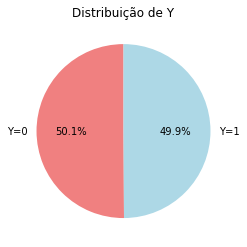

In [69]:
plt.pie(percentages, labels=['Y=0', 'Y=1'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Distribuição de Y')
plt.show()

Este gráfico representa a distribuição de Y, sendo que este apenas se caracteriza por 0 ou 1. O gráfico plt.pie apresenta 50.1% para Y==0 e 49.9% para Y==1.

In [70]:
alvos_por_miRNA = dataset.groupby('miRNA_ID')['Target_ID'].nunique()
top_n = 20
top_miRNAs = alvos_por_miRNA.nlargest(top_n)

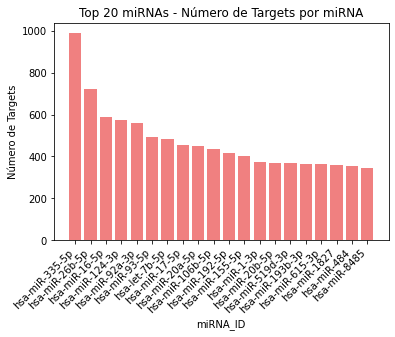

In [71]:
plt.bar(top_miRNAs.index, top_miRNAs.values, color='lightcoral')

plt.xlabel('miRNA_ID')
plt.ylabel('Número de Targets')
plt.title(f'Top {top_n} miRNAs - Número de Targets por miRNA')
plt.xticks(rotation=45, ha='right')
plt.show()

Utilizando um gráfico de barras e selecionando apenas os top 20 miRNA que têm mais interações com mais targets, representou-se o número de alvos por miRNA.

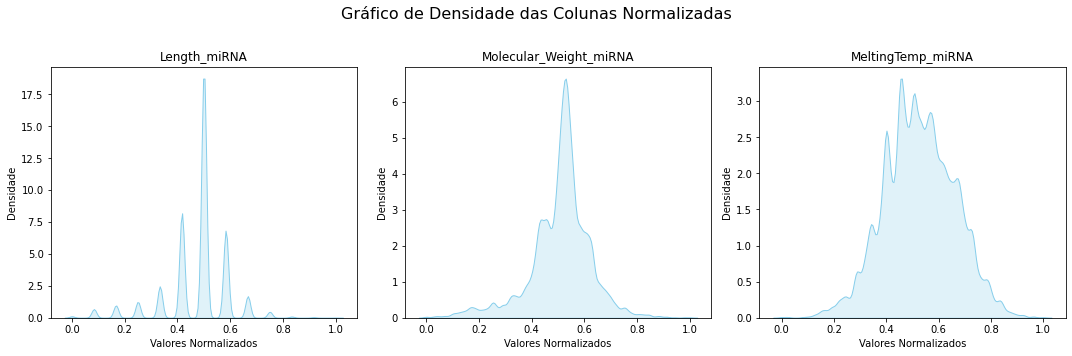

In [72]:
import seaborn as sns

df_normalized = dataset.iloc[:, 6:9]

columns_normalized = df_normalized.columns

fig, axes = plt.subplots(1, len(columns_normalized), figsize=(15, 5))
fig.suptitle('Gráfico de Densidade das Colunas Normalizadas', fontsize=16)

for i, col in enumerate(columns_normalized):
    sns.kdeplot(df_normalized[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Valores Normalizados')
    axes[i].set_ylabel('Densidade')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

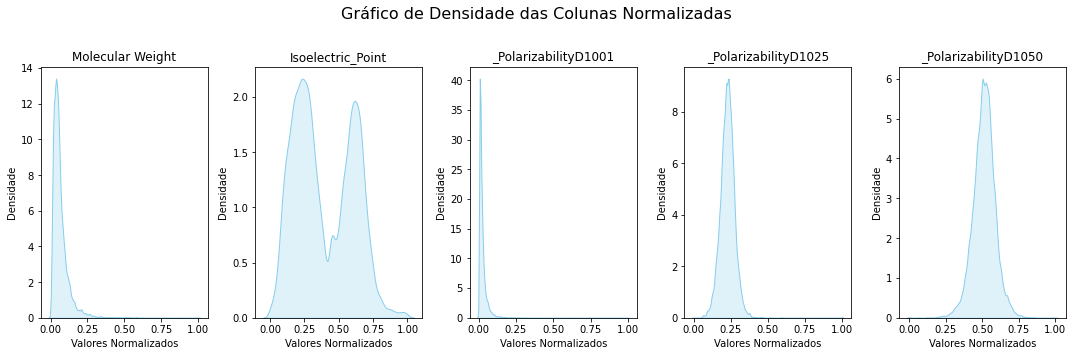

In [73]:
import seaborn as sns

df_normalized = dataset.iloc[:, 10:15]

columns_normalized = df_normalized.columns

fig, axes = plt.subplots(1, len(columns_normalized), figsize=(15, 5))
fig.suptitle('Gráfico de Densidade das Colunas Normalizadas', fontsize=16)

for i, col in enumerate(columns_normalized):
    sns.kdeplot(df_normalized[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Valores Normalizados')
    axes[i].set_ylabel('Densidade')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

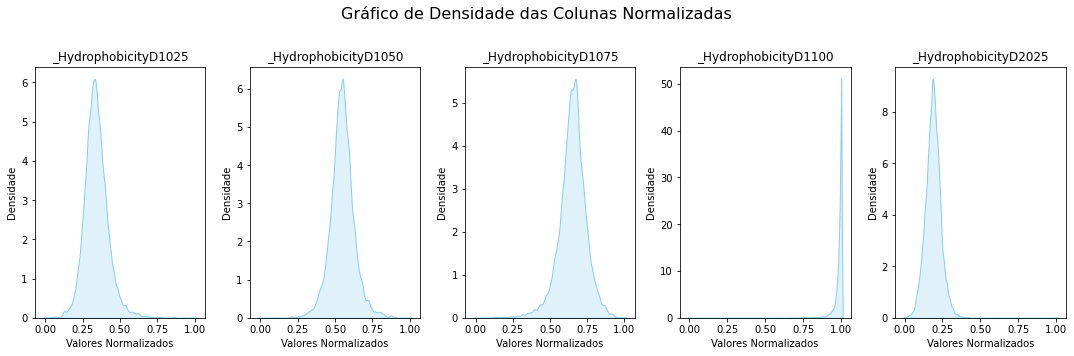

In [74]:
import seaborn as sns

df_normalized = dataset.iloc[:, 90:95]

columns_normalized = df_normalized.columns

fig, axes = plt.subplots(1, len(columns_normalized), figsize=(15, 5))
fig.suptitle('Gráfico de Densidade das Colunas Normalizadas', fontsize=16)

for i, col in enumerate(columns_normalized):
    sns.kdeplot(df_normalized[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Valores Normalizados')
    axes[i].set_ylabel('Densidade')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

Os três blocos de código anteriores descrevem apenas alguns gráficos de densidade para demonstrar a distribuição dos valores da normalização de algumas colunas.

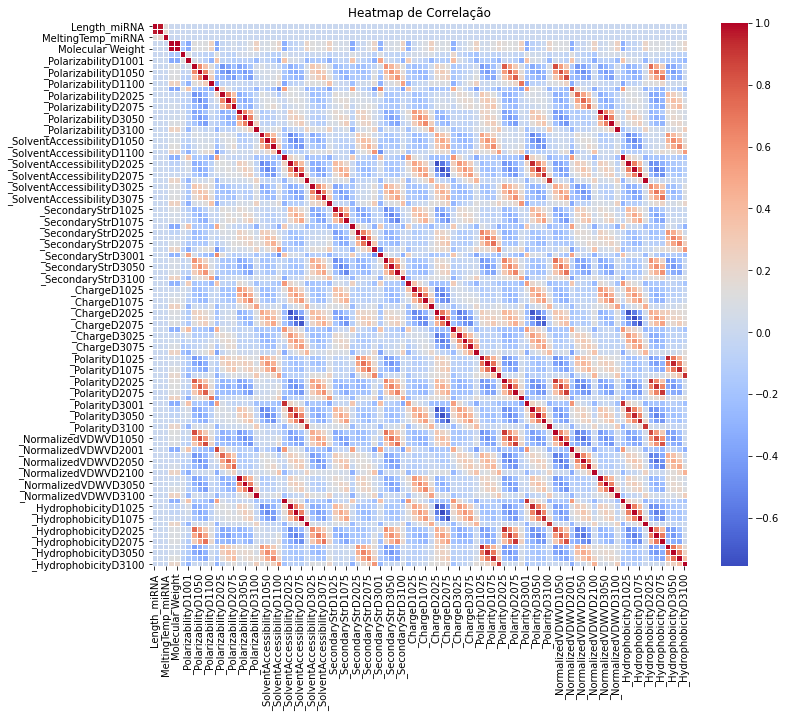

In [75]:
correlation_matrix = dataset.iloc[:, 6:].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap de Correlação')
plt.show()

Este gráfico representa a matrix de correlação dentro das colunas de interesse. Ou seja, simboliza se há ou não uma correlação entre os diversos descritores, seja ela positiva ou negativa. A linha diagonal a meio do gráfico é sempre correlação = 1 porque emparelha cada descritor consigo próprio.

## Secção 2 - Análise não supervisionada

##### 2.1 - Reportar/analisar os resultados obtidos para as técnicas de redução de dimensionalidade e visualização de dados

###### PCA

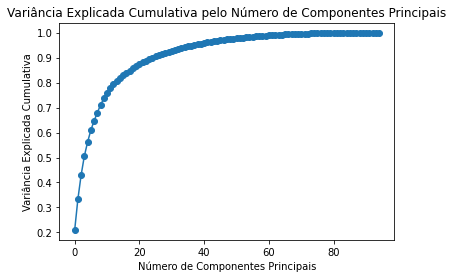

In [76]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit(dataset.iloc[:, 6:])

cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Variância Explicada Cumulativa pelo Número de Componentes Principais')
plt.show()

In [77]:
import numpy as np

threshold_variance = 0.95

num_components = np.argmax(cumulative_explained_variance >= threshold_variance) + 1

print(f'Número de Componentes para {threshold_variance * 100}% de Variância Explicada: {num_components}')

Número de Componentes para 95.0% de Variância Explicada: 38


In [78]:
pca = PCA(n_components=38)
X_pca = pca.fit_transform(dataset.iloc[:, 6:])

In [79]:
data_pca = {f'PCA_Component_{i+1}': X_pca[:, i] for i in range(pca.n_components)}
df_pca_components = pd.DataFrame(data_pca)

df_pca_components

,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,PCA_Component_5,PCA_Component_6,PCA_Component_7,PCA_Component_8,PCA_Component_9,PCA_Component_10,...,PCA_Component_29,PCA_Component_30,PCA_Component_31,PCA_Component_32,PCA_Component_33,PCA_Component_34,PCA_Component_35,PCA_Component_36,PCA_Component_37,PCA_Component_38
0,-0.051536,0.189300,-0.269800,0.055276,0.063383,0.194782,-0.329952,0.208229,0.062020,-0.168384,...,0.031003,-0.066315,0.007563,0.082174,0.051182,-0.007975,-0.033904,0.015970,-0.015131,0.023396
1,0.481252,0.053915,0.447099,-0.232874,0.045021,0.013504,-0.111888,0.033754,0.031286,-0.101601,...,-0.019845,0.014032,-0.018280,-0.037902,0.061128,0.004941,0.091996,-0.012202,-0.001752,-0.063415
2,0.130039,-0.609468,-0.191946,0.159744,0.081180,-0.132206,0.005124,-0.188272,-0.022667,0.065291,...,-0.064589,-0.026750,-0.057707,0.017234,0.024344,0.020524,-0.045691,0.010417,-0.015572,0.042487
3,0.165969,-0.221073,0.337203,0.257064,-0.034464,-0.234749,0.104252,0.225036,-0.032871,0.099059,...,-0.040975,-0.013735,0.038127,-0.048544,0.012866,-0.018369,0.003175,-0.033777,-0.004902,-0.023306
4,-0.010316,0.382847,-0.045950,-0.064378,0.088917,0.092195,-0.002413,-0.041858,0.011610,0.040136,...,0.002979,0.000897,-0.026278,0.013383,-0.001668,-0.000481,-0.013211,-0.003337,-0.006814,0.025064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299254,-0.109773,-0.204854,-0.084171,-0.406268,0.064669,0.174475,-0.116558,-0.075365,0.381991,-0.101452,...,0.027138,-0.062975,-0.015445,0.063687,-0.113461,-0.015761,0.010306,0.008152,-0.001601,-0.049153
299255,0.291868,0.011211,-0.257425,-0.168616,-0.450952,0.069875,0.083074,-0.001850,-0.232998,0.167237,...,0.013331,0.059996,-0.016670,-0.023844,-0.038744,0.070557,-0.027044,-0.033342,-0.032379,-0.018784
299256,-0.033730,0.139404,-0.211301,0.043899,0.256899,-0.170669,-0.072218,-0.144888,0.149353,-0.115794,...,-0.050824,0.016566,-0.023205,0.041895,0.038826,0.019938,0.000482,-0.008566,-0.020009,-0.003973
299257,0.235521,-0.346629,0.214812,-0.261208,0.001092,-0.087289,0.061516,0.081150,-0.009110,0.035523,...,0.067025,-0.000168,-0.010758,-0.025468,0.032026,0.018621,-0.009850,0.022958,-0.005738,0.008478


In [80]:
df_pca_components.to_csv('df_pca_components.csv')

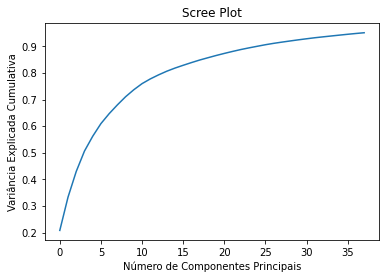

In [81]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Scree Plot')
plt.show()

No PCA, verificamos primeiro quantas componentes principais justificavam 95% de variabilidade dos nossos dados. Sabendo que eram necessárias 38 componentes, procedemos ao fit_transform do PCA dos nossos dados guardando estes resultados num dataset e num ficheiro csv à parte.

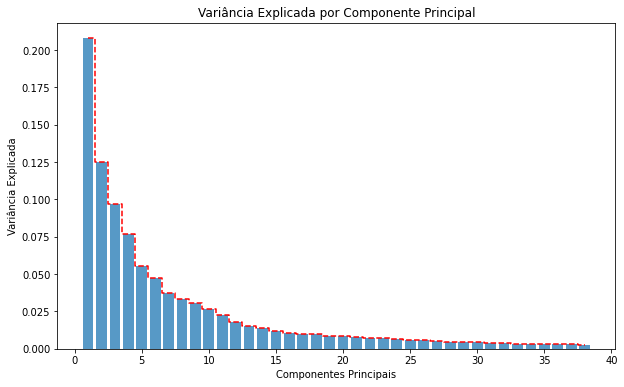

In [82]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.75, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, where='mid', color='red', linestyle='--')
plt.xlabel('Componentes Principais')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada por Componente Principal')
plt.show()

Aqui é visível a contribuição de cada componente que explica 95% da variabilidade dos nossos dados. É possivel constatar que a primeira componente explica mais 0.100 do que a segunda e tem uma vantagem significamente grande para com as outras componentes.

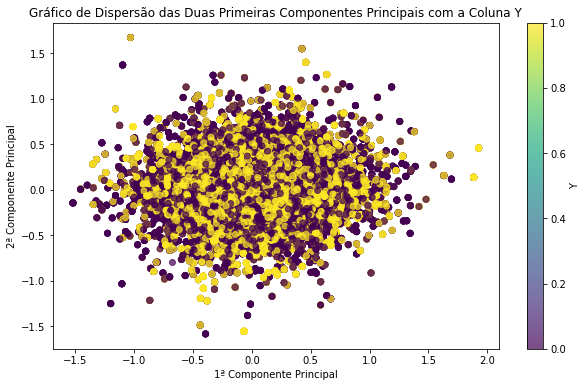

In [83]:
df_pca_with_y = pd.concat([df_pca_components, dataset['Y']], axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(df_pca_with_y['PCA_Component_1'], df_pca_with_y['PCA_Component_2'], c=df_pca_with_y['Y'], cmap='viridis', alpha=0.7)
plt.xlabel('1ª Componente Principal')
plt.ylabel('2ª Componente Principal')
plt.title('Gráfico de Dispersão das Duas Primeiras Componentes Principais com a Coluna Y')
plt.colorbar(label='Y')
plt.show()

Neste gráfico de dispersão é claramente visível overlapping das classes de Y (0  e 1). Isto indica que as duas primeiras componentes principais não são suficientes para separar claramente as classes. Já seria de esperar sendo que são necessárias 38 componentes principais. Apesar disso, é possível notar alguns pontos fora do aglomerado o que pode indicar alguns outliers dentro dos valores gerais das componentes. Igualmente acerca deste agrupamento é possível concluir que existe correlação significativa entre ambas componentes.

##### 2.2 - Reportar/analisar os resultados obtidos a partir dos algoritmos de clustering

###### Dendrograma

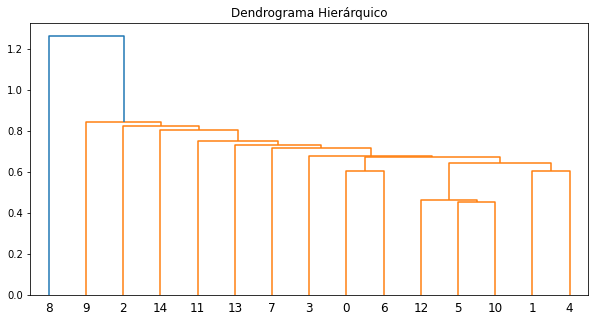

In [84]:
from fastcluster import linkage
from scipy.cluster import hierarchy

X_pca = dataset.iloc[:, 6:]

X_sampled = X_pca.sample(frac=0.00005, random_state=42)

Z_fast = linkage(X_sampled, method='single')
plt.figure(figsize=(10, 5))
hierarchy.dendrogram(Z_fast)
plt.title('Dendrograma Hierárquico')
plt.show()

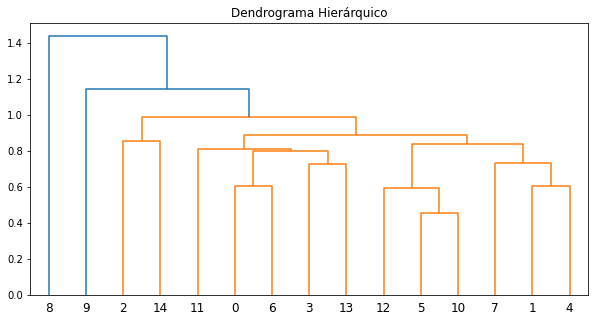

In [85]:
from fastcluster import linkage
from scipy.cluster import hierarchy

X_pca = dataset.iloc[:, 6:]

X_sampled = X_pca.sample(frac=0.00005, random_state=42)

Z_fast = linkage(X_sampled, method='average')
plt.figure(figsize=(10, 5))
hierarchy.dendrogram(Z_fast)
plt.title('Dendrograma Hierárquico')
plt.show()

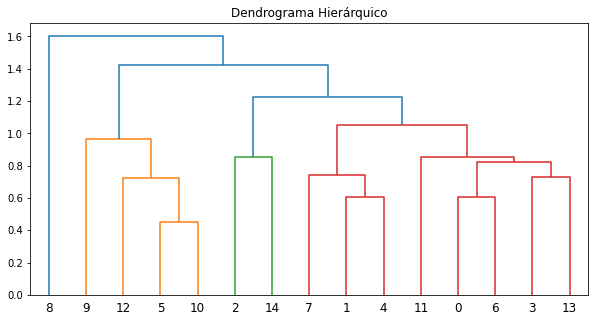

In [86]:
from fastcluster import linkage
from scipy.cluster import hierarchy

X = dataset.iloc[:, 6:]

X_sampled = X.sample(frac=0.00005, random_state=42)

Z_fast = linkage(X_sampled, method='complete')
plt.figure(figsize=(10, 5))
hierarchy.dendrogram(Z_fast)
plt.title('Dendrograma Hierárquico')
plt.show()

Nos três blocos de código acima, procedeu-se à exemplificação de cluster das nossas colunas de interesse por dendrogramas. Neste estilo de gráficos, quanto mais cedo duas amostras são agrupadas, mais próximas elas estão em termos de similaridade, assim como se tiverem uniões mais baixas. As diferentes cores simbolizam diferentes clusters o que evidencia estrutura hierarquica dos dados. Como não apresentam linhas soltas pode-se concluir que não há outliers (os dados já estavam normalizados, o que faz sentido).

### 3 - Aprendizagem máquina

##### Modelos ML com os dados originais

In [1]:
import pandas as pd

dataset = pd.read_csv('final_dataset_after_preprocessing.csv', index_col=0)
df_pca_components = pd.read_csv('df_pca_components.csv', index_col=0)

In [2]:
dataset['miRNA_one_hot_encoding'] = dataset['miRNA_one_hot_encoding'].str.replace('\n', ',')

##### Train_Test_Split para 80/20 de treino e teste. Foram aplicados os modelos Logistic Regression, Random Forest, Gradient Boosting e Decision Tree aos dados originais do dataset (colunas de interesse)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, 6:], dataset['Y'], test_size=0.2, random_state=42)

In [101]:
model_LR = LogisticRegression(max_iter=1000)
model_name = 'Logistic Regression'

model_LR.fit(X_train, y_train)
predictions = model_LR.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

predictions = model_LR.predict_proba(X_test)
predictions = predictions[:, 1]

print(f"Model: {model_name}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print("AUROC:", roc_auc_score(y_test, predictions))
print("="*50)

Model: Logistic Regression
Accuracy: 0.5325135333823431
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.54      0.54     29917
           1       0.53      0.52      0.53     29935

    accuracy                           0.53     59852
   macro avg       0.53      0.53      0.53     59852
weighted avg       0.53      0.53      0.53     59852

AUROC: 0.5448659179154638


In [102]:
model_RF = RandomForestClassifier()
model_name = 'Random Forest'

model_RF.fit(X_train, y_train)
predictions = model_RF.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

predictions = model_RF.predict_proba(X_test)
predictions = predictions[:, 1]

print(f"Model: {model_name}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print("AUROC:", roc_auc_score(y_test, predictions))
print("="*50)

Model: Random Forest
Accuracy: 0.7044543206576221
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70     29917
           1       0.70      0.72      0.71     29935

    accuracy                           0.70     59852
   macro avg       0.70      0.70      0.70     59852
weighted avg       0.70      0.70      0.70     59852

AUROC: 0.7706334996340497


In [103]:
model_GB = GradientBoostingClassifier()
model_name = 'Gradient Boosting'

model_GB.fit(X_train, y_train)
predictions = model_GB.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

predictions = model_GB.predict_proba(X_test)
predictions = predictions[:, 1]

print(f"Model: {model_name}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print("AUROC:", roc_auc_score(y_test, predictions))
print("="*50)

Model: Gradient Boosting
Accuracy: 0.5992949274878032
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.63      0.61     29917
           1       0.61      0.56      0.58     29935

    accuracy                           0.60     59852
   macro avg       0.60      0.60      0.60     59852
weighted avg       0.60      0.60      0.60     59852

AUROC: 0.6426611570894831


In [105]:
model_DT = DecisionTreeClassifier()
model_name = 'Decision Tree'

model_DT.fit(X_train, y_train)
predictions = model_DT.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

predictions = model_DT.predict_proba(X_test)
predictions = predictions[:, 1]

print(f"Model: {model_name}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print("AUROC:", roc_auc_score(y_test, predictions))
print("="*50)

Model: Decision Tree
Accuracy: 0.6532446701864599
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65     29917
           1       0.65      0.66      0.66     29935

    accuracy                           0.65     59852
   macro avg       0.65      0.65      0.65     59852
weighted avg       0.65      0.65      0.65     59852

AUROC: 0.6532428500098533


Accoring to Accuracy Values: ___Random Forest >> Decision Tree >> Gradient Boosting >> Logistic Regression___

A _accuracy_ mede a proporção de instâncias corretamente classificadas em relação ao total.

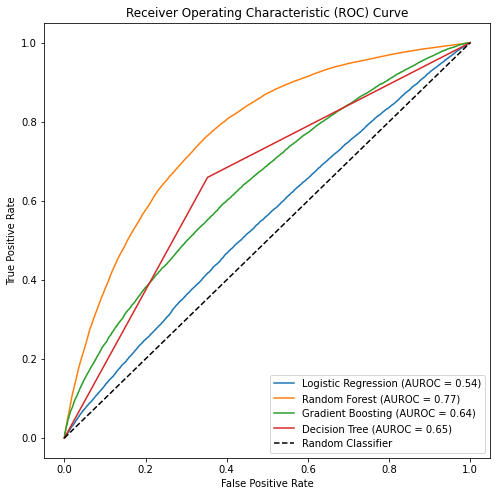

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

predictions_lr = model_LR.predict_proba(X_test)[:, 1]
predictions_rf = model_RF.predict_proba(X_test)[:, 1]
predictions_gb = model_GB.predict_proba(X_test)[:, 1]
predictions_dt = model_DT.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, predictions_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, predictions_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, predictions_gb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, predictions_dt)

auroc_lr = auc(fpr_lr, tpr_lr)
auroc_rf = auc(fpr_rf, tpr_rf)
auroc_gb = auc(fpr_gb, tpr_gb)
auroc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUROC = {auroc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUROC = {auroc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUROC = {auroc_gb:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUROC = {auroc_dt:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Neste gráfico, o eixo do xx representa a taxa de falsos positivos, ou seja, a proporção de instâncias negativas incorretamente classificadas como positivas, enquanto que o eixo do yy, representa a taxa de verdadeiros positivos, ou seja, a proporção de instâncias positivas corretamente classificadas como positivas. A AUC é a área sob a curva ROC. Quanto maior a AUC, melhor o desempenho do modelo. A linha diagonal tracejada representa o desempenho de um classificador aleatório. Qualquer modelo que esteja abaixo dessa linha é considerado pior do que uma previsão aleatória. O gráfico permite comparar o desempenho de diferentes modelos. Posto isto é possível visualizar aquilo que já tinhamos concluido sobre a ordem performativa dos modelos.

##### Matrix de confusão para o melhor modelo performativo

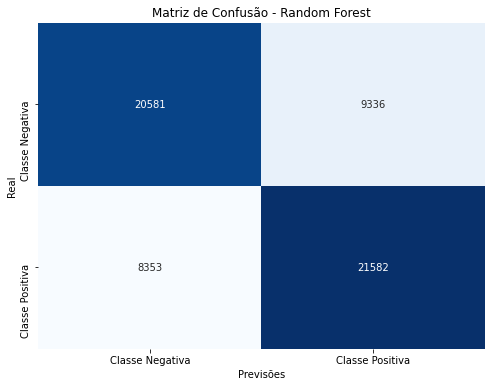

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model_RF.predict(X_test)
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe Negativa', 'Classe Positiva'],
            yticklabels=['Classe Negativa', 'Classe Positiva'])
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.show()

Dentro de um universo de 59852 instâncias, 20 581 foram classificados corretamente como pertencentes à classe negativa, assim como 21 582 foram classificados corretamente como pertencentes à classe positiva. Por outro lado, 9 336 e 8 353 instâncias não foram classificadas corretamente, constituindo falsos positivos e negativos, respetivamente.

##### Modelos ML com os dados de PCA

##### Train_Test_Split para 80/20 de treino e teste. Foram aplicados os modelos Logistic Regression, Random Forest, Gradient Boosting e Decision Tree aos dados das componentes principais dadas no PCA

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(df_pca_components, dataset['Y'], test_size=0.2, random_state=42)

In [108]:
model_LR_PCA = LogisticRegression(max_iter=1000)
model_name = 'Logistic Regression'

model_LR_PCA.fit(X_train, y_train)
predictions = model_LR_PCA.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

predictions = model_LR_PCA.predict_proba(X_test)
predictions = predictions[:, 1]

print(f"Model: {model_name}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print("AUROC:", roc_auc_score(y_test, predictions))
print("="*50)

Model: Logistic Regression
Accuracy: 0.5240760542671924
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.55      0.54     29917
           1       0.53      0.50      0.51     29935

    accuracy                           0.52     59852
   macro avg       0.52      0.52      0.52     59852
weighted avg       0.52      0.52      0.52     59852

AUROC: 0.5337849593887


In [109]:
model_RF_PCA = RandomForestClassifier()
model_name = 'Random Forest'

model_RF_PCA.fit(X_train, y_train)
predictions = model_RF_PCA.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

predictions = model_RF_PCA.predict_proba(X_test)
predictions = predictions[:, 1]

print(f"Model: {model_name}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print("AUROC:", roc_auc_score(y_test, predictions))
print("="*50)

Model: Random Forest
Accuracy: 0.7102853705807659
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71     29917
           1       0.71      0.72      0.71     29935

    accuracy                           0.71     59852
   macro avg       0.71      0.71      0.71     59852
weighted avg       0.71      0.71      0.71     59852

AUROC: 0.773562055733518


In [110]:
model_GB_PCA = GradientBoostingClassifier()
model_name = 'Gradient Boosting'

model_GB_PCA.fit(X_train, y_train)
predictions = model_GB_PCA.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

predictions = model_GB_PCA.predict_proba(X_test)
predictions = predictions[:, 1]

print(f"Model: {model_name}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print("AUROC:", roc_auc_score(y_test, predictions))
print("="*50)

Model: Gradient Boosting
Accuracy: 0.5726291519080399
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60     29917
           1       0.58      0.50      0.54     29935

    accuracy                           0.57     59852
   macro avg       0.57      0.57      0.57     59852
weighted avg       0.57      0.57      0.57     59852

AUROC: 0.610689873741716


In [111]:
model_DT_PCA = DecisionTreeClassifier()
model_name = 'Decision Tree'

model_DT_PCA.fit(X_train, y_train)
predictions = model_DT_PCA.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

predictions = model_DT_PCA.predict_proba(X_test)
predictions = predictions[:, 1]

print(f"Model: {model_name}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print("AUROC:", roc_auc_score(y_test, predictions))
print("="*50)

Model: Decision Tree
Accuracy: 0.5552696651740961
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.55      0.55     29917
           1       0.55      0.57      0.56     29935

    accuracy                           0.56     59852
   macro avg       0.56      0.56      0.56     59852
weighted avg       0.56      0.56      0.56     59852

AUROC: 0.5552666100949557


Accoring to Accuracy Values: ___Random Forest >> Gradient Boosting >> Decision Tree >> Logistic Regression___

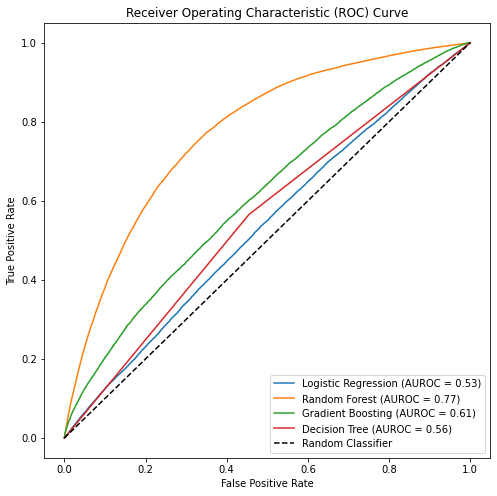

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

predictions_lr = model_LR_PCA.predict_proba(X_test)[:, 1]
predictions_rf = model_RF_PCA.predict_proba(X_test)[:, 1]
predictions_gb = model_GB_PCA.predict_proba(X_test)[:, 1]
predictions_dt = model_DT_PCA.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, predictions_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, predictions_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, predictions_gb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, predictions_dt)

auroc_lr = auc(fpr_lr, tpr_lr)
auroc_rf = auc(fpr_rf, tpr_rf)
auroc_gb = auc(fpr_gb, tpr_gb)
auroc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUROC = {auroc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUROC = {auroc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUROC = {auroc_gb:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUROC = {auroc_dt:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Neste gráfico, o eixo do xx representa a taxa de falsos positivos, ou seja, a proporção de instâncias negativas incorretamente classificadas como positivas, enquanto que o eixo do yy, representa a taxa de verdadeiros positivos, ou seja, a proporção de instâncias positivas corretamente classificadas como positivas. A AUC é a área sob a curva ROC. Quanto maior a AUC, melhor o desempenho do modelo. A linha diagonal tracejada representa o desempenho de um classificador aleatório. Qualquer modelo que esteja abaixo dessa linha é considerado pior do que uma previsão aleatória. O gráfico permite comparar o desempenho de diferentes modelos. Posto isto é possível visualizar aquilo que já tinhamos concluido sobre a ordem performativa dos modelos.

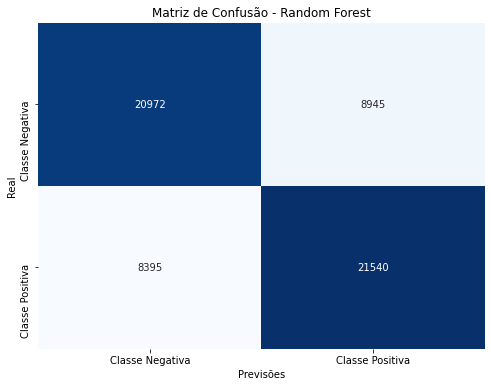

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model_RF_PCA.predict(X_test)
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe Negativa', 'Classe Positiva'],
            yticklabels=['Classe Negativa', 'Classe Positiva'])
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.show()

Dentro de um universo de 59852 instâncias, 20 972 foram classificados corretamente como pertencentes à classe negativa, assim como 21 540 foram classificados corretamente como pertencentes à classe positiva. Por outro lado, 8 945 e 8 395 instâncias não foram classificadas corretamente, constituindo falsos positivos e negativos, respetivamente.

### 4 - Deep Learning

##### Treinamos um modelo DL pela primeira vez com apenas duas camadas relu e uma sigmoid

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(df_pca_components, dataset['Y'], test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, np.round(predictions))
report = classification_report(y_test, np.round(predictions))

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Epoch 1/20
7482/7482 [==============================] - 21s 3ms/step - loss: 0.6896 - accuracy: 0.5321 - val_loss: 0.6845 - val_accuracy: 0.5542
Epoch 2/20
7482/7482 [==============================] - 19s 2ms/step - loss: 0.6809 - accuracy: 0.5599 - val_loss: 0.6798 - val_accuracy: 0.5623
Epoch 3/20
7482/7482 [==============================] - 18s 2ms/step - loss: 0.6723 - accuracy: 0.5775 - val_loss: 0.6717 - val_accuracy: 0.5801
Epoch 4/20
7482/7482 [==============================] - 18s 2ms/step - loss: 0.6639 - accuracy: 0.5945 - val_loss: 0.6684 - val_accuracy: 0.5871
Epoch 5/20
7482/7482 [==============================] - 27s 4ms/step - loss: 0.6568 - accuracy: 0.6055 - val_loss: 0.6621 - val_accuracy: 0.5996
Epoch 6/20
7482/7482 [==============================] - 19s 3ms/step - loss: 0.6509 - accuracy: 0.6149 - val_loss: 0.6571 - val_accuracy: 0.6078
Epoch 7/20
7482/7482 [==============================] - 20s 3ms/step - loss: 0.6461 - accuracy: 0.6211 - val_loss: 0.6539 - val_ac

In [34]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/20
7169/7169 [==============================] - 16s 2ms/step - loss: 0.6132 - accuracy: 0.6633 - val_loss: 0.6209 - val_accuracy: 0.6565
Epoch 2/20
7169/7169 [==============================] - 15s 2ms/step - loss: 0.6122 - accuracy: 0.6648 - val_loss: 0.6229 - val_accuracy: 0.6578
Epoch 3/20
7169/7169 [==============================] - 14s 2ms/step - loss: 0.6108 - accuracy: 0.6657 - val_loss: 0.6251 - val_accuracy: 0.6570
Epoch 4/20
7169/7169 [==============================] - 15s 2ms/step - loss: 0.6097 - accuracy: 0.6669 - val_loss: 0.6240 - val_accuracy: 0.6558
Epoch 5/20
7169/7169 [==============================] - 15s 2ms/step - loss: 0.6086 - accuracy: 0.6681 - val_loss: 0.6249 - val_accuracy: 0.6536
Epoch 6/20
7169/7169 [==============================] - 17s 2ms/step - loss: 0.6079 - accuracy: 0.6684 - val_loss: 0.6219 - val_accuracy: 0.6578
Epoch 7/20
7169/7169 [==============================] - 16s 2ms/step - loss: 0.6067 - accuracy: 0.6702 - val_loss: 0.6247 - val_ac

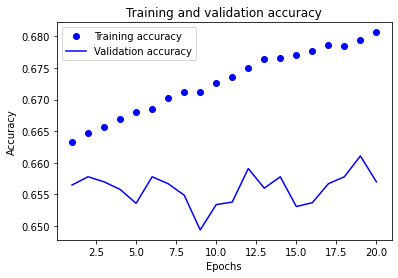

In [35]:
history_dict = history.history
acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

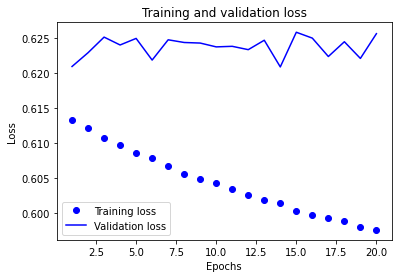

In [36]:
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Apesar dos resultados não terem sido maus, treinamos o modelo com dropout, regularizadores e early stopping, separadamente. O objetivo é ter treinamentos com uma performance maior

##### Modelo para Evitar Overfitting com dropout

In [42]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

custom_optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, np.round(predictions))
report = classification_report(y_test, np.round(predictions))

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Epoch 1/20
7482/7482 [==============================] - 22s 3ms/step - loss: 0.6924 - accuracy: 0.5170 - val_loss: 0.6906 - val_accuracy: 0.5379
Epoch 2/20
7482/7482 [==============================] - 23s 3ms/step - loss: 0.6906 - accuracy: 0.5284 - val_loss: 0.6884 - val_accuracy: 0.5458
Epoch 3/20
7482/7482 [==============================] - 22s 3ms/step - loss: 0.6892 - accuracy: 0.5359 - val_loss: 0.6872 - val_accuracy: 0.5461
Epoch 4/20
7482/7482 [==============================] - 20s 3ms/step - loss: 0.6876 - accuracy: 0.5416 - val_loss: 0.6855 - val_accuracy: 0.5537
Epoch 5/20
7482/7482 [==============================] - 18s 2ms/step - loss: 0.6864 - accuracy: 0.5467 - val_loss: 0.6830 - val_accuracy: 0.5582
Epoch 6/20
7482/7482 [==============================] - 23s 3ms/step - loss: 0.6858 - accuracy: 0.5482 - val_loss: 0.6831 - val_accuracy: 0.5601
Epoch 7/20
7482/7482 [==============================] - 23s 3ms/step - loss: 0.6850 - accuracy: 0.5504 - val_loss: 0.6821 - val_ac

Apesar de se ter adicionado layers de dropout o desempenho deste modelo não foi melhor que o treinamento original  (accuracy de 0.57 para uma accuracy de 0.64).

##### Modelo para Evitar Overfitting com regularizers

In [45]:
from tensorflow.keras import regularizers

model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid'))

custom_optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, np.round(predictions))
report = classification_report(y_test, np.round(predictions))

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Epoch 1/20
7482/7482 [==============================] - 21s 3ms/step - loss: 0.7036 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 2/20
7482/7482 [==============================] - 17s 2ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 3/20
7482/7482 [==============================] - 26s 3ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 4/20
7482/7482 [==============================] - 25s 3ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 5/20
7482/7482 [==============================] - 22s 3ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 6/20
7482/7482 [==============================] - 31s 4ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 7/20
7482/7482 [==============================] - 26s 3ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6932 - val_ac

C:\Users\lucia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tendo em conta que a val_loss não diminiu ou diminiu 0.0001 durante as 20 epochs tendo voltando a subir novamente em algumas e não aconteceu previsão para Y = 1, não consideramos este modelo um bom exemplo para lidar com overfitting ou para treinar os nossos dados.

##### Modelo para Evitar Overfitting com EarlyStopping

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

custom_optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, np.round(predictions))
report = classification_report(y_test, np.round(predictions))

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Epoch 1/20
7482/7482 [==============================] - 27s 4ms/step - loss: 0.6896 - accuracy: 0.5324 - val_loss: 0.6850 - val_accuracy: 0.5505
Epoch 2/20
7482/7482 [==============================] - 24s 3ms/step - loss: 0.6816 - accuracy: 0.5583 - val_loss: 0.6791 - val_accuracy: 0.5635
Epoch 3/20
7482/7482 [==============================] - 23s 3ms/step - loss: 0.6730 - accuracy: 0.5768 - val_loss: 0.6720 - val_accuracy: 0.5782
Epoch 4/20
7482/7482 [==============================] - 23s 3ms/step - loss: 0.6653 - accuracy: 0.5915 - val_loss: 0.6662 - val_accuracy: 0.5899
Epoch 5/20
7482/7482 [==============================] - 20s 3ms/step - loss: 0.6584 - accuracy: 0.6035 - val_loss: 0.6604 - val_accuracy: 0.6002
Epoch 6/20
7482/7482 [==============================] - 21s 3ms/step - loss: 0.6524 - accuracy: 0.6133 - val_loss: 0.6610 - val_accuracy: 0.5972
Epoch 7/20
7482/7482 [==============================] - 30s 4ms/step - loss: 0.6473 - accuracy: 0.6204 - val_loss: 0.6541 - val_ac

Dentro dos modelos gerados para lidar com overfitting, desde criar camadas dropout, trabalhar com regularizadores e early stopping apenas este último conseguiu dar resultados coerentes e com uma accuracy ligeiramente melhor. Contudo, podemos ainda trabalhar no modelo original ou no de early stopping e adicionar mais camadas 'relu', por exemplo, e analisar os seus resultados.

##### Modelo original DL, treinado com mais duas camadas 'relu'

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(df_pca_components, dataset['Y'], test_size=0.2, random_state=42)

model2 = keras.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

predictions = model2.predict(X_test)

accuracy = accuracy_score(y_test, np.round(predictions))
report = classification_report(y_test, np.round(predictions))

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Epoch 1/20
7482/7482 [==============================] - 20s 2ms/step - loss: 0.6898 - accuracy: 0.5290 - val_loss: 0.6846 - val_accuracy: 0.5516
Epoch 2/20
7482/7482 [==============================] - 26s 3ms/step - loss: 0.6800 - accuracy: 0.5623 - val_loss: 0.6755 - val_accuracy: 0.5756
Epoch 3/20
7482/7482 [==============================] - 23s 3ms/step - loss: 0.6688 - accuracy: 0.5858 - val_loss: 0.6668 - val_accuracy: 0.5906
Epoch 4/20
7482/7482 [==============================] - 25s 3ms/step - loss: 0.6587 - accuracy: 0.6035 - val_loss: 0.6598 - val_accuracy: 0.6010
Epoch 5/20
7482/7482 [==============================] - 26s 4ms/step - loss: 0.6487 - accuracy: 0.6179 - val_loss: 0.6533 - val_accuracy: 0.6135
Epoch 6/20
7482/7482 [==============================] - 29s 4ms/step - loss: 0.6403 - accuracy: 0.6298 - val_loss: 0.6484 - val_accuracy: 0.6219
Epoch 7/20
7482/7482 [==============================] - 25s 3ms/step - loss: 0.6331 - accuracy: 0.6385 - val_loss: 0.6437 - val_ac

Ao adicionar mais estas duas camadas ao treinamento do modelo foi possível obter, com o mesmo número de epochs, uma maior accuracy, com uma adição de cerca de 0.02. 

In [50]:
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/20
7169/7169 [==============================] - 18s 3ms/step - loss: 0.5838 - accuracy: 0.6930 - val_loss: 0.5932 - val_accuracy: 0.6814
Epoch 2/20
7169/7169 [==============================] - 21s 3ms/step - loss: 0.5815 - accuracy: 0.6950 - val_loss: 0.5903 - val_accuracy: 0.6906
Epoch 3/20
7169/7169 [==============================] - 19s 3ms/step - loss: 0.5800 - accuracy: 0.6968 - val_loss: 0.5907 - val_accuracy: 0.6839
Epoch 4/20
7169/7169 [==============================] - 20s 3ms/step - loss: 0.5782 - accuracy: 0.6981 - val_loss: 0.5976 - val_accuracy: 0.6850
Epoch 5/20
7169/7169 [==============================] - 18s 3ms/step - loss: 0.5763 - accuracy: 0.7000 - val_loss: 0.5944 - val_accuracy: 0.6873
Epoch 6/20
7169/7169 [==============================] - 25s 4ms/step - loss: 0.5752 - accuracy: 0.7005 - val_loss: 0.5957 - val_accuracy: 0.6811
Epoch 7/20
7169/7169 [==============================] - 27s 4ms/step - loss: 0.5738 - accuracy: 0.7017 - val_loss: 0.5971 - val_ac

Neste caso a val_loss tem altos e baixos durante as epochs o que pode simbolizar presença de overfitting. Contudo, isto também se deve ao facto de, para realizar os gráficos seguintes, estarmos a usar apenas uma pequena fração do dataset. No resultado acima a val_loss sempre diminuiu ao longo das 20 epochs.

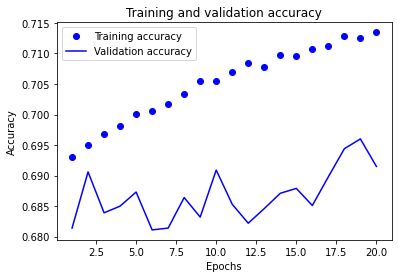

In [51]:
history_dict = history2.history
acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

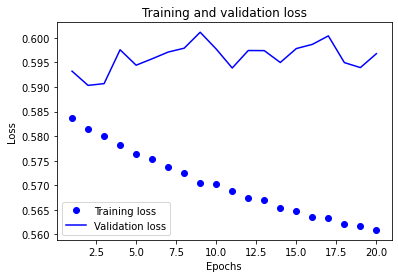

In [52]:
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Modelo earlystopping, treinado com mais duas camadas 'relu'

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

custom_optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, np.round(predictions))
report = classification_report(y_test, np.round(predictions))

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Epoch 1/20
7482/7482 [==============================] - 25s 3ms/step - loss: 0.6900 - accuracy: 0.5308 - val_loss: 0.6858 - val_accuracy: 0.5457
Epoch 2/20
7482/7482 [==============================] - 24s 3ms/step - loss: 0.6810 - accuracy: 0.5605 - val_loss: 0.6768 - val_accuracy: 0.5707
Epoch 3/20
7482/7482 [==============================] - 23s 3ms/step - loss: 0.6693 - accuracy: 0.5856 - val_loss: 0.6685 - val_accuracy: 0.5865
Epoch 4/20
7482/7482 [==============================] - 24s 3ms/step - loss: 0.6580 - accuracy: 0.6035 - val_loss: 0.6617 - val_accuracy: 0.5995
Epoch 5/20
7482/7482 [==============================] - 23s 3ms/step - loss: 0.6480 - accuracy: 0.6206 - val_loss: 0.6560 - val_accuracy: 0.6090
Epoch 6/20
7482/7482 [==============================] - 23s 3ms/step - loss: 0.6401 - accuracy: 0.6301 - val_loss: 0.6514 - val_accuracy: 0.6185
Epoch 7/20
7482/7482 [==============================] - 22s 3ms/step - loss: 0.6329 - accuracy: 0.6411 - val_loss: 0.6483 - val_ac

Ao adicionar mais estas duas camadas ao treinamento do modelo early stopping foi também possível obter, com o mesmo número de epochs, uma maior accuracy, comparado ao primeiro modelo early stopping e ao primeiro modelo original, com uma adição de cerca de 0.02. 